In [27]:
import pandas as pd
import numpy as np
import os
from Image_processing import array_image as a_m
import matplotlib.pyplot as plt
from tqdm import tqdm
import copy
import pickle
import skimage.io

# <\b> First Database <\b>

In [2]:
poke = pd.read_csv("pokemon\pokemon.csv") #Our pokedex, names and types

In [3]:
poke.tail()

,abilities,against_bug,against_dark,against_dragon,against_electric,against_fairy,against_fight,against_fire,against_flying,against_ghost,...,percentage_male,pokedex_number,sp_attack,sp_defense,speed,type1,type2,weight_kg,generation,is_legendary
796,['Beast Boost'],0.25,1.0,0.5,2.0,0.5,1.0,2.0,0.5,1.0,...,NaN,797,107,101,61,steel,flying,999.9,7,1
797,['Beast Boost'],1.00,1.0,0.5,0.5,0.5,2.0,4.0,1.0,1.0,...,NaN,798,59,31,109,grass,steel,0.1,7,1
798,['Beast Boost'],2.00,0.5,2.0,0.5,4.0,2.0,0.5,1.0,0.5,...,NaN,799,97,53,43,dark,dragon,888.0,7,1
799,['Prism Armor'],2.00,2.0,1.0,1.0,1.0,0.5,1.0,1.0,2.0,...,NaN,800,127,89,79,psychic,NaN,230.0,7,1
800,['Soul-Heart'],0.25,0.5,0.0,1.0,0.5,1.0,2.0,0.5,1.0,...,NaN,801,130,115,65,steel,fairy,80.5,7,1


In [4]:
new_poke = poke[["name","type1","type2"]]
print(new_poke.shape)

def listing_types(type1):
    listo = [[type1,i] for i in new_poke["type2"] ]
    return listo
def dbl(x):
    return 2*x






all_list = []


for i in range(new_poke.shape[0]):
    mini_list = []
    type1 = new_poke["type1"][i]
    type2 = new_poke["type2"][i]
    if type(type1) != float:
        mini_list.append(type1)
    if type(type2) != float:
        mini_list.append(type2)
    all_list.append(mini_list)
new_poke["all_types"] = all_list
def make_lower_case(x):
    return x.lower()
new_poke['name'] = new_poke['name'].apply(make_lower_case)
new_poke = new_poke.set_index('name') #NEED to get type from name
new_poke.loc['charizard']

(801, 3)


C:\Users\Nelson\Anaconda3\lib\site-packages\ipykernel_launcher.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\Users\Nelson\Anaconda3\lib\site-packages\ipykernel_launcher.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


type1                  fire
type2                flying
all_types    [fire, flying]
Name: charizard, dtype: object

In [5]:
all_indv_types = list(new_poke["type1"]) # Get a list of pokemon types
all_indv_types = set(all_indv_types) # Remove duplicates and arrange alphabetically
all_indv_types = sorted(list(all_indv_types)) # list of the 18 types in lower case
all_indv_types

['bug',
 'dark',
 'dragon',
 'electric',
 'fairy',
 'fighting',
 'fire',
 'flying',
 'ghost',
 'grass',
 'ground',
 'ice',
 'normal',
 'poison',
 'psychic',
 'rock',
 'steel',
 'water']

In [6]:
#Create a dataframe of the one-shot vectors for multiple classes
all_types_list = list(new_poke["all_types"])
all_labels = []
for i in all_types_list:
    if i not in all_labels:
        all_labels.append(i)
all_labels

[['grass', 'poison'],
 ['fire'],
 ['fire', 'flying'],
 ['water'],
 ['bug'],
 ['bug', 'flying'],
 ['bug', 'poison'],
 ['normal', 'flying'],
 ['normal', 'dark'],
 ['poison'],
 ['electric'],
 ['electric', 'electric'],
 ['ground', 'ice'],
 ['poison', 'ground'],
 ['fairy'],
 ['fire', 'ice'],
 ['normal', 'fairy'],
 ['poison', 'flying'],
 ['bug', 'grass'],
 ['ground', 'ground'],
 ['fighting'],
 ['water', 'fighting'],
 ['psychic'],
 ['water', 'poison'],
 ['rock', 'ground'],
 ['water', 'psychic'],
 ['electric', 'steel'],
 ['water', 'ice'],
 ['poison', 'poison'],
 ['ghost', 'poison'],
 ['grass', 'psychic'],
 ['ground'],
 ['ground', 'fire'],
 ['normal'],
 ['ground', 'rock'],
 ['grass'],
 ['psychic', 'fairy'],
 ['ice', 'psychic'],
 ['water', 'flying'],
 ['rock', 'water'],
 ['rock', 'flying'],
 ['ice', 'flying'],
 ['electric', 'flying'],
 ['dragon'],
 ['dragon', 'flying'],
 ['water', 'electric'],
 ['fairy', 'flying'],
 ['psychic', 'flying'],
 ['water', 'fairy'],
 ['rock'],
 ['grass', 'flying'],
 ['

In [123]:
#Create One Hot data
# the data to load into Df will be rows or One-hots^
#NEED, generates all relevant one_hots
one_hot_data = []
for each_label in all_labels:
    mini_l = []
    for each_type in all_indv_types:
        if each_type in each_label:
            mini_l.append(1)
        else:
            mini_l.append(0)
    one_hot_data.append(mini_l)

#JUST FOR VISUALIZATION
one_hot_df_labels = pd.DataFrame(one_hot_data, columns = all_indv_types) # The data frame
one_hot_df_labels["type_labels"] = all_labels
#one_hot_df_labels = one_hot_df_labels.set_index("type_labels")
one_hot_df_labels.head(13) # Data frame with all one-hots for multi-label classif, indexed by df.loc['types']


    

,bug,dark,dragon,electric,fairy,fighting,fire,flying,ghost,grass,ground,ice,normal,poison,psychic,rock,steel,water,type_labels
0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,"[grass, poison]"
1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,[fire]
2,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,"[fire, flying]"
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,[water]
4,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,[bug]
5,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,"[bug, flying]"
6,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,"[bug, poison]"
7,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,"[normal, flying]"
8,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,"[normal, dark]"
9,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,[poison]


In [9]:
# Create a function that converts name to one-hot

dic_row_types = dict(zip(range(len(all_labels)),one_hot_df_labels['type_labels'])) #index: type
#PROBLEM, when you set name of rows to lists like all_types, pandas freaks out.
#SOLUTION: make a dictionarry of row-to-type
dic_row_one_hots = dict(zip(range(len(all_labels)),one_hot_data)) #index: onehots

def get_key(val,my_dict): 
    for key, value in my_dict.items(): 
         if val == value: 
            return key 
  
    print("key doesn't exist, probably mispelled pokemon name")
#NEED
def get_type(name):
    if name.lower() in new_poke.index: #New_poke is db with names and type1, type2 and all_types
        return new_poke.loc[name.lower()][2]
    
def get_one_hot(name):
    label = get_type(name)
    index_of_labeldict = get_key(label, dic_row_types)
    one_hot = dic_row_one_hots.get(index_of_labeldict)
    return one_hot #will return None and print if pokemon name not in pokedex
    
def one_hot_to_type(one_h, as_string = True):
    indexer = get_key(one_h, dic_row_one_hots)
    if as_string:
        return f"{dic_row_types.get(indexer)}"
    return dic_row_types.get(indexer)
    
    

print(get_type('zygarde'))
get_one_hot('bulasaur') #returns None if misspelled or doesnt exist

['dragon', 'ground']
key doesn't exist, probably mispelled pokemon name


In [10]:
#TODO: save all these one_hots for pictures in a file
#This first database is 120x120

In [11]:
os.listdir() # List of strings of files
cwd = os.getcwd() # String of current directory

data_dir = os.listdir()[2] # Where the pic data ais
data_dir= os.path.join(cwd,data_dir) # Went into the folder 

target_dir = "C:/Users/Nelson/Desktop/Software carp/Final project/Data/pokemon-images-dataset-by-type/all"
image_names = os.listdir(target_dir) # Listed files in The folder specified above target_dir
image_names #


['abomasnow.png',
 'abra.png',
 'absol.png',
 'accelgor.png',
 'aegislash-blade.png',
 'aerodactyl.png',
 'aggron.png',
 'aipom.png',
 'alakazam.png',
 'alomomola.png',
 'altaria.png',
 'amaura.png',
 'ambipom.png',
 'amoonguss.png',
 'ampharos.png',
 'anorith.png',
 'araquanid.jpg',
 'arbok.png',
 'arcanine.png',
 'arceus.png',
 'archen.png',
 'archeops.png',
 'ariados.png',
 'armaldo.png',
 'aromatisse.png',
 'aron.png',
 'articuno.png',
 'audino.png',
 'aurorus.png',
 'avalugg.png',
 'axew.png',
 'azelf.png',
 'azumarill.png',
 'azurill.png',
 'bagon.png',
 'baltoy.png',
 'banette.png',
 'barbaracle.png',
 'barboach.png',
 'basculin-red-striped.png',
 'bastiodon.png',
 'bayleef.png',
 'beartic.png',
 'beautifly.png',
 'beedrill.png',
 'beheeyem.png',
 'beldum.png',
 'bellossom.png',
 'bellsprout.png',
 'bergmite.png',
 'bewear.jpg',
 'bibarel.png',
 'bidoof.png',
 'binacle.png',
 'bisharp.png',
 'blacephalon.jpg',
 'blastoise.png',
 'blaziken.png',
 'blissey.png',
 'blitzle.png',
 '

C:/Users/Nelson/Desktop/Software carp/Final project/Data/pokemon-images-dataset-by-type/all\hoopa-confined.png
IMAGE size : 120 x 120
(120, 120, 4)
0.0
hoopa-confined.png
key doesn't exist, probably mispelled pokemon name
<class 'NoneType'>


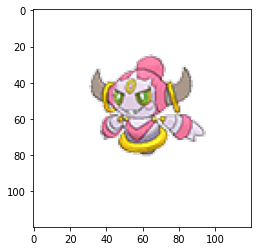

In [12]:
testo = image_names[307]
image_path = os.path.join(target_dir,testo)

absol = a_m(image_path, transparent= True)
#this database has png, or transparent images, PIL gives me handy warning if I don't treat it properly
# So we convert it to ARGB, however, ARGB is 4 dimensional
print(testo)
plt.imshow(absol)
print(type(get_one_hot(testo.split(".")[0]))) #splitting image name to just name WORKED! 
# if get_one_hot == None
get_type(testo.split(".")[0])

In [38]:
X = []
Y = []
# Take image names from list of files to create: path\image_name
# Acess the image from path and turn it into array
# Also, take the image_name and find the one-hot
target_dir = "C:/Users/Nelson/Desktop/Software carp/Final project/Data/pokemon-images-dataset-by-type/all"
for each_image in tqdm(image_names):
    image_path = os.path.join(target_dir,each_image)
    array_of_image = a_m(image_path, transparent= False) # pictures are .png
    pokemon_name = each_image.split(".")[0] #pokemon name w/o png
    Y.append(get_one_hot(pokemon_name))
    X.append(array_of_image)
    

  0%|                                                                                          | 0/809 [00:00<?, ?it/s]

C:/Users/Nelson/Desktop/Software carp/Final project/Data/pokemon-images-dataset-by-type/all\abomasnow.png
IMAGE size : 120 x 120
(120, 120, 3)
0.0
C:/Users/Nelson/Desktop/Software carp/Final project/Data/pokemon-images-dataset-by-type/all\abra.png
IMAGE size : 120 x 120
(120, 120, 3)
0.0


C:\Users\Nelson\Anaconda3\lib\site-packages\PIL\Image.py:989: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


C:/Users/Nelson/Desktop/Software carp/Final project/Data/pokemon-images-dataset-by-type/all\absol.png
IMAGE size : 120 x 120
(120, 120, 3)
0.0
C:/Users/Nelson/Desktop/Software carp/Final project/Data/pokemon-images-dataset-by-type/all\accelgor.png
IMAGE size : 120 x 120
(120, 120, 3)
0.0
C:/Users/Nelson/Desktop/Software carp/Final project/Data/pokemon-images-dataset-by-type/all\aegislash-blade.png
IMAGE size : 120 x 120
(120, 120, 3)
0.0
key doesn't exist, probably mispelled pokemon name
C:/Users/Nelson/Desktop/Software carp/Final project/Data/pokemon-images-dataset-by-type/all\aerodactyl.png
IMAGE size : 120 x 120
(120, 120, 3)
0.0
C:/Users/Nelson/Desktop/Software carp/Final project/Data/pokemon-images-dataset-by-type/all\aggron.png
IMAGE size : 120 x 120
(120, 120, 3)
0.0
C:/Users/Nelson/Desktop/Software carp/Final project/Data/pokemon-images-dataset-by-type/all\aipom.png
IMAGE size : 120 x 120
(120, 120, 3)
0.0
C:/Users/Nelson/Desktop/Software carp/Final project/Data/pokemon-images-

  2%|█▍                                                                              | 14/809 [00:00<00:05, 133.67it/s]

C:/Users/Nelson/Desktop/Software carp/Final project/Data/pokemon-images-dataset-by-type/all\ampharos.png
IMAGE size : 120 x 120
(120, 120, 3)
0.0
C:/Users/Nelson/Desktop/Software carp/Final project/Data/pokemon-images-dataset-by-type/all\anorith.png
IMAGE size : 120 x 120
(120, 120, 3)
0.0
C:/Users/Nelson/Desktop/Software carp/Final project/Data/pokemon-images-dataset-by-type/all\araquanid.jpg
IMAGE size : 120 x 120
(120, 120, 3)
1.0
C:/Users/Nelson/Desktop/Software carp/Final project/Data/pokemon-images-dataset-by-type/all\arbok.png
IMAGE size : 120 x 120
(120, 120, 3)
0.0
C:/Users/Nelson/Desktop/Software carp/Final project/Data/pokemon-images-dataset-by-type/all\arcanine.png
IMAGE size : 120 x 120
(120, 120, 3)
0.0
C:/Users/Nelson/Desktop/Software carp/Final project/Data/pokemon-images-dataset-by-type/all\arceus.png
IMAGE size : 120 x 120
(120, 120, 3)
0.0
C:/Users/Nelson/Desktop/Software carp/Final project/Data/pokemon-images-dataset-by-type/all\archen.png
IMAGE size : 120 x 120
(12

  3%|██▊                                                                             | 28/809 [00:00<00:05, 133.67it/s]

C:/Users/Nelson/Desktop/Software carp/Final project/Data/pokemon-images-dataset-by-type/all\aurorus.png
IMAGE size : 120 x 120
(120, 120, 3)
0.0
C:/Users/Nelson/Desktop/Software carp/Final project/Data/pokemon-images-dataset-by-type/all\avalugg.png
IMAGE size : 120 x 120
(120, 120, 3)
0.0
C:/Users/Nelson/Desktop/Software carp/Final project/Data/pokemon-images-dataset-by-type/all\axew.png
IMAGE size : 120 x 120
(120, 120, 3)
0.0
C:/Users/Nelson/Desktop/Software carp/Final project/Data/pokemon-images-dataset-by-type/all\azelf.png
IMAGE size : 120 x 120
(120, 120, 3)
0.0
C:/Users/Nelson/Desktop/Software carp/Final project/Data/pokemon-images-dataset-by-type/all\azumarill.png
IMAGE size : 120 x 120
(120, 120, 3)
0.0
C:/Users/Nelson/Desktop/Software carp/Final project/Data/pokemon-images-dataset-by-type/all\azurill.png
IMAGE size : 120 x 120
(120, 120, 3)
0.0
C:/Users/Nelson/Desktop/Software carp/Final project/Data/pokemon-images-dataset-by-type/all\bagon.png
IMAGE size : 120 x 120
(120, 12

  5%|████▏                                                                           | 42/809 [00:00<00:05, 133.21it/s]

C:/Users/Nelson/Desktop/Software carp/Final project/Data/pokemon-images-dataset-by-type/all\beartic.png
IMAGE size : 120 x 120
(120, 120, 3)
0.0
C:/Users/Nelson/Desktop/Software carp/Final project/Data/pokemon-images-dataset-by-type/all\beautifly.png
IMAGE size : 120 x 120
(120, 120, 3)
0.0
C:/Users/Nelson/Desktop/Software carp/Final project/Data/pokemon-images-dataset-by-type/all\beedrill.png
IMAGE size : 120 x 120
(120, 120, 3)
0.0
C:/Users/Nelson/Desktop/Software carp/Final project/Data/pokemon-images-dataset-by-type/all\beheeyem.png
IMAGE size : 120 x 120
(120, 120, 3)
0.0
C:/Users/Nelson/Desktop/Software carp/Final project/Data/pokemon-images-dataset-by-type/all\beldum.png
IMAGE size : 120 x 120
(120, 120, 3)
0.0
C:/Users/Nelson/Desktop/Software carp/Final project/Data/pokemon-images-dataset-by-type/all\bellossom.png
IMAGE size : 120 x 120
(120, 120, 3)
0.0
C:/Users/Nelson/Desktop/Software carp/Final project/Data/pokemon-images-dataset-by-type/all\bellsprout.png
IMAGE size : 120 x

  7%|█████▍                                                                          | 55/809 [00:00<00:05, 131.61it/s]

C:/Users/Nelson/Desktop/Software carp/Final project/Data/pokemon-images-dataset-by-type/all\blacephalon.jpg
IMAGE size : 120 x 120
(120, 120, 3)
1.0
key doesn't exist, probably mispelled pokemon name
C:/Users/Nelson/Desktop/Software carp/Final project/Data/pokemon-images-dataset-by-type/all\blastoise.png
IMAGE size : 120 x 120
(120, 120, 3)
0.0
C:/Users/Nelson/Desktop/Software carp/Final project/Data/pokemon-images-dataset-by-type/all\blaziken.png
IMAGE size : 120 x 120
(120, 120, 3)
0.0
C:/Users/Nelson/Desktop/Software carp/Final project/Data/pokemon-images-dataset-by-type/all\blissey.png
IMAGE size : 120 x 120
(120, 120, 3)
0.0
C:/Users/Nelson/Desktop/Software carp/Final project/Data/pokemon-images-dataset-by-type/all\blitzle.png
IMAGE size : 120 x 120
(120, 120, 3)
0.0
C:/Users/Nelson/Desktop/Software carp/Final project/Data/pokemon-images-dataset-by-type/all\boldore.png
IMAGE size : 120 x 120
(120, 120, 3)
0.0
C:/Users/Nelson/Desktop/Software carp/Final project/Data/pokemon-images-

  9%|██████▉                                                                         | 70/809 [00:00<00:05, 134.53it/s]

C:/Users/Nelson/Desktop/Software carp/Final project/Data/pokemon-images-dataset-by-type/all\bruxish.jpg
IMAGE size : 120 x 120
(120, 120, 3)
1.0
C:/Users/Nelson/Desktop/Software carp/Final project/Data/pokemon-images-dataset-by-type/all\budew.png
IMAGE size : 120 x 120
(120, 120, 3)
0.0
C:/Users/Nelson/Desktop/Software carp/Final project/Data/pokemon-images-dataset-by-type/all\buizel.png
IMAGE size : 120 x 120
(120, 120, 3)
0.0
C:/Users/Nelson/Desktop/Software carp/Final project/Data/pokemon-images-dataset-by-type/all\bulbasaur.png
IMAGE size : 120 x 120
(120, 120, 3)
0.0
C:/Users/Nelson/Desktop/Software carp/Final project/Data/pokemon-images-dataset-by-type/all\buneary.png
IMAGE size : 120 x 120
(120, 120, 3)
0.0
C:/Users/Nelson/Desktop/Software carp/Final project/Data/pokemon-images-dataset-by-type/all\bunnelby.png
IMAGE size : 120 x 120
(120, 120, 3)
0.0
C:/Users/Nelson/Desktop/Software carp/Final project/Data/pokemon-images-dataset-by-type/all\burmy.png
IMAGE size : 120 x 120
(120,

 10%|████████▎                                                                       | 84/809 [00:00<00:05, 134.66it/s]

C:/Users/Nelson/Desktop/Software carp/Final project/Data/pokemon-images-dataset-by-type/all\carracosta.png
IMAGE size : 120 x 120
(120, 120, 3)
0.0
C:/Users/Nelson/Desktop/Software carp/Final project/Data/pokemon-images-dataset-by-type/all\carvanha.png
IMAGE size : 120 x 120
(120, 120, 3)
0.0
C:/Users/Nelson/Desktop/Software carp/Final project/Data/pokemon-images-dataset-by-type/all\cascoon.png
IMAGE size : 120 x 120
(120, 120, 3)
0.0
C:/Users/Nelson/Desktop/Software carp/Final project/Data/pokemon-images-dataset-by-type/all\castform.png
IMAGE size : 120 x 120
(120, 120, 3)
0.0
C:/Users/Nelson/Desktop/Software carp/Final project/Data/pokemon-images-dataset-by-type/all\caterpie.png
IMAGE size : 120 x 120
(120, 120, 3)
0.0
C:/Users/Nelson/Desktop/Software carp/Final project/Data/pokemon-images-dataset-by-type/all\celebi.png
IMAGE size : 120 x 120
(120, 120, 3)
0.0
C:/Users/Nelson/Desktop/Software carp/Final project/Data/pokemon-images-dataset-by-type/all\celesteela.jpg
IMAGE size : 120 x

 12%|█████████▊                                                                     | 100/809 [00:00<00:05, 140.39it/s]

C:/Users/Nelson/Desktop/Software carp/Final project/Data/pokemon-images-dataset-by-type/all\chesnaught.png
IMAGE size : 120 x 120
(120, 120, 3)
0.0
C:/Users/Nelson/Desktop/Software carp/Final project/Data/pokemon-images-dataset-by-type/all\chespin.png
IMAGE size : 120 x 120
(120, 120, 3)
0.0
C:/Users/Nelson/Desktop/Software carp/Final project/Data/pokemon-images-dataset-by-type/all\chikorita.png
IMAGE size : 120 x 120
(120, 120, 3)
0.0
C:/Users/Nelson/Desktop/Software carp/Final project/Data/pokemon-images-dataset-by-type/all\chimchar.png
IMAGE size : 120 x 120
(120, 120, 3)
0.0
C:/Users/Nelson/Desktop/Software carp/Final project/Data/pokemon-images-dataset-by-type/all\chimecho.png
IMAGE size : 120 x 120
(120, 120, 3)
0.0
C:/Users/Nelson/Desktop/Software carp/Final project/Data/pokemon-images-dataset-by-type/all\chinchou.png
IMAGE size : 120 x 120
(120, 120, 3)
0.0
C:/Users/Nelson/Desktop/Software carp/Final project/Data/pokemon-images-dataset-by-type/all\chingling.png
IMAGE size : 120

 14%|███████████▎                                                                   | 116/809 [00:00<00:04, 142.51it/s]

C:/Users/Nelson/Desktop/Software carp/Final project/Data/pokemon-images-dataset-by-type/all\cobalion.png
IMAGE size : 120 x 120
(120, 120, 3)
0.0
C:/Users/Nelson/Desktop/Software carp/Final project/Data/pokemon-images-dataset-by-type/all\cofagrigus.png
IMAGE size : 120 x 120
(120, 120, 3)
0.0
C:/Users/Nelson/Desktop/Software carp/Final project/Data/pokemon-images-dataset-by-type/all\combee.png
IMAGE size : 120 x 120
(120, 120, 3)
0.0
C:/Users/Nelson/Desktop/Software carp/Final project/Data/pokemon-images-dataset-by-type/all\combusken.png
IMAGE size : 120 x 120
(120, 120, 3)
0.0
C:/Users/Nelson/Desktop/Software carp/Final project/Data/pokemon-images-dataset-by-type/all\comfey.jpg
IMAGE size : 120 x 120
(120, 120, 3)
1.0
C:/Users/Nelson/Desktop/Software carp/Final project/Data/pokemon-images-dataset-by-type/all\conkeldurr.png
IMAGE size : 120 x 120
(120, 120, 3)
0.0
C:/Users/Nelson/Desktop/Software carp/Final project/Data/pokemon-images-dataset-by-type/all\corphish.png
IMAGE size : 120 x

 16%|████████████▊                                                                  | 131/809 [00:00<00:04, 142.08it/s]

C:/Users/Nelson/Desktop/Software carp/Final project/Data/pokemon-images-dataset-by-type/all\crawdaunt.png
IMAGE size : 120 x 120
(120, 120, 3)
0.0
C:/Users/Nelson/Desktop/Software carp/Final project/Data/pokemon-images-dataset-by-type/all\cresselia.png
IMAGE size : 120 x 120
(120, 120, 3)
0.0
C:/Users/Nelson/Desktop/Software carp/Final project/Data/pokemon-images-dataset-by-type/all\croagunk.png
IMAGE size : 120 x 120
(120, 120, 3)
0.0
C:/Users/Nelson/Desktop/Software carp/Final project/Data/pokemon-images-dataset-by-type/all\crobat.png
IMAGE size : 120 x 120
(120, 120, 3)
0.0
C:/Users/Nelson/Desktop/Software carp/Final project/Data/pokemon-images-dataset-by-type/all\croconaw.png
IMAGE size : 120 x 120
(120, 120, 3)
0.0
C:/Users/Nelson/Desktop/Software carp/Final project/Data/pokemon-images-dataset-by-type/all\crustle.png
IMAGE size : 120 x 120
(120, 120, 3)
0.0
C:/Users/Nelson/Desktop/Software carp/Final project/Data/pokemon-images-dataset-by-type/all\cryogonal.png
IMAGE size : 120 x 

 18%|██████████████▏                                                                | 145/809 [00:01<00:04, 135.41it/s]

C:/Users/Nelson/Desktop/Software carp/Final project/Data/pokemon-images-dataset-by-type/all\darumaka.png
IMAGE size : 120 x 120
(120, 120, 3)
0.0
C:/Users/Nelson/Desktop/Software carp/Final project/Data/pokemon-images-dataset-by-type/all\decidueye.jpg
IMAGE size : 120 x 120
(120, 120, 3)
1.0
C:/Users/Nelson/Desktop/Software carp/Final project/Data/pokemon-images-dataset-by-type/all\dedenne.png
IMAGE size : 120 x 120
(120, 120, 3)
0.0
C:/Users/Nelson/Desktop/Software carp/Final project/Data/pokemon-images-dataset-by-type/all\deerling.png
IMAGE size : 120 x 120
(120, 120, 3)
0.0
C:/Users/Nelson/Desktop/Software carp/Final project/Data/pokemon-images-dataset-by-type/all\deino.png
IMAGE size : 120 x 120
(120, 120, 3)
0.0
C:/Users/Nelson/Desktop/Software carp/Final project/Data/pokemon-images-dataset-by-type/all\delcatty.png
IMAGE size : 120 x 120
(120, 120, 3)
0.0
C:/Users/Nelson/Desktop/Software carp/Final project/Data/pokemon-images-dataset-by-type/all\delibird.png
IMAGE size : 120 x 120

 20%|███████████████▌                                                               | 159/809 [00:01<00:05, 127.88it/s]

C:/Users/Nelson/Desktop/Software carp/Final project/Data/pokemon-images-dataset-by-type/all\diancie.png
IMAGE size : 120 x 120
(120, 120, 3)
0.0
C:/Users/Nelson/Desktop/Software carp/Final project/Data/pokemon-images-dataset-by-type/all\diggersby.png
IMAGE size : 120 x 120
(120, 120, 3)
0.0
C:/Users/Nelson/Desktop/Software carp/Final project/Data/pokemon-images-dataset-by-type/all\diglett.png
IMAGE size : 120 x 120
(120, 120, 3)
0.0
C:/Users/Nelson/Desktop/Software carp/Final project/Data/pokemon-images-dataset-by-type/all\ditto.png
IMAGE size : 120 x 120
(120, 120, 3)
0.0
C:/Users/Nelson/Desktop/Software carp/Final project/Data/pokemon-images-dataset-by-type/all\dodrio.png
IMAGE size : 120 x 120
(120, 120, 3)
0.0
C:/Users/Nelson/Desktop/Software carp/Final project/Data/pokemon-images-dataset-by-type/all\doduo.png
IMAGE size : 120 x 120
(120, 120, 3)
0.0
C:/Users/Nelson/Desktop/Software carp/Final project/Data/pokemon-images-dataset-by-type/all\donphan.png
IMAGE size : 120 x 120
(120, 

 21%|████████████████▊                                                              | 172/809 [00:01<00:05, 124.91it/s]

C:/Users/Nelson/Desktop/Software carp/Final project/Data/pokemon-images-dataset-by-type/all\dratini.png
IMAGE size : 120 x 120
(120, 120, 3)
0.0
C:/Users/Nelson/Desktop/Software carp/Final project/Data/pokemon-images-dataset-by-type/all\drifblim.png
IMAGE size : 120 x 120
(120, 120, 3)
0.0
C:/Users/Nelson/Desktop/Software carp/Final project/Data/pokemon-images-dataset-by-type/all\drifloon.png
IMAGE size : 120 x 120
(120, 120, 3)
0.0
C:/Users/Nelson/Desktop/Software carp/Final project/Data/pokemon-images-dataset-by-type/all\drilbur.png
IMAGE size : 120 x 120
(120, 120, 3)
0.0
C:/Users/Nelson/Desktop/Software carp/Final project/Data/pokemon-images-dataset-by-type/all\drowzee.png
IMAGE size : 120 x 120
(120, 120, 3)
0.0
C:/Users/Nelson/Desktop/Software carp/Final project/Data/pokemon-images-dataset-by-type/all\druddigon.png
IMAGE size : 120 x 120
(120, 120, 3)
0.0
C:/Users/Nelson/Desktop/Software carp/Final project/Data/pokemon-images-dataset-by-type/all\ducklett.png
IMAGE size : 120 x 12

 23%|██████████████████                                                             | 185/809 [00:01<00:05, 118.23it/s]

C:/Users/Nelson/Desktop/Software carp/Final project/Data/pokemon-images-dataset-by-type/all\duskull.png
IMAGE size : 120 x 120
(120, 120, 3)
0.0
C:/Users/Nelson/Desktop/Software carp/Final project/Data/pokemon-images-dataset-by-type/all\dustox.png
IMAGE size : 120 x 120
(120, 120, 3)
0.0
C:/Users/Nelson/Desktop/Software carp/Final project/Data/pokemon-images-dataset-by-type/all\dwebble.png
IMAGE size : 120 x 120
(120, 120, 3)
0.0
C:/Users/Nelson/Desktop/Software carp/Final project/Data/pokemon-images-dataset-by-type/all\eelektrik.png
IMAGE size : 120 x 120
(120, 120, 3)
0.0
C:/Users/Nelson/Desktop/Software carp/Final project/Data/pokemon-images-dataset-by-type/all\eelektross.png
IMAGE size : 120 x 120
(120, 120, 3)
0.0
C:/Users/Nelson/Desktop/Software carp/Final project/Data/pokemon-images-dataset-by-type/all\eevee.png
IMAGE size : 120 x 120
(120, 120, 3)
0.0
C:/Users/Nelson/Desktop/Software carp/Final project/Data/pokemon-images-dataset-by-type/all\ekans.png
IMAGE size : 120 x 120
(12

 25%|███████████████████▍                                                           | 199/809 [00:01<00:05, 121.24it/s]

C:/Users/Nelson/Desktop/Software carp/Final project/Data/pokemon-images-dataset-by-type/all\emolga.png
IMAGE size : 120 x 120
(120, 120, 3)
0.0
C:/Users/Nelson/Desktop/Software carp/Final project/Data/pokemon-images-dataset-by-type/all\empoleon.png
IMAGE size : 120 x 120
(120, 120, 3)
0.0
C:/Users/Nelson/Desktop/Software carp/Final project/Data/pokemon-images-dataset-by-type/all\entei.png
IMAGE size : 120 x 120
(120, 120, 3)
0.0
C:/Users/Nelson/Desktop/Software carp/Final project/Data/pokemon-images-dataset-by-type/all\escavalier.png
IMAGE size : 120 x 120
(120, 120, 3)
0.0
C:/Users/Nelson/Desktop/Software carp/Final project/Data/pokemon-images-dataset-by-type/all\espeon.png
IMAGE size : 120 x 120
(120, 120, 3)
0.0
C:/Users/Nelson/Desktop/Software carp/Final project/Data/pokemon-images-dataset-by-type/all\espurr.png
IMAGE size : 120 x 120
(120, 120, 3)
0.0
C:/Users/Nelson/Desktop/Software carp/Final project/Data/pokemon-images-dataset-by-type/all\excadrill.png
IMAGE size : 120 x 120
(1

 26%|████████████████████▋                                                          | 212/809 [00:01<00:04, 121.91it/s]

C:/Users/Nelson/Desktop/Software carp/Final project/Data/pokemon-images-dataset-by-type/all\fennekin.png
IMAGE size : 120 x 120
(120, 120, 3)
0.0
C:/Users/Nelson/Desktop/Software carp/Final project/Data/pokemon-images-dataset-by-type/all\feraligatr.png
IMAGE size : 120 x 120
(120, 120, 3)
0.0
C:/Users/Nelson/Desktop/Software carp/Final project/Data/pokemon-images-dataset-by-type/all\ferroseed.png
IMAGE size : 120 x 120
(120, 120, 3)
0.0
C:/Users/Nelson/Desktop/Software carp/Final project/Data/pokemon-images-dataset-by-type/all\ferrothorn.png
IMAGE size : 120 x 120
(120, 120, 3)
0.0
C:/Users/Nelson/Desktop/Software carp/Final project/Data/pokemon-images-dataset-by-type/all\finneon.png
IMAGE size : 120 x 120
(120, 120, 3)
0.0
C:/Users/Nelson/Desktop/Software carp/Final project/Data/pokemon-images-dataset-by-type/all\flaaffy.png
IMAGE size : 120 x 120
(120, 120, 3)
0.0
C:/Users/Nelson/Desktop/Software carp/Final project/Data/pokemon-images-dataset-by-type/all\flabebe.png
IMAGE size : 120 

 28%|█████████████████████▉                                                         | 225/809 [00:01<00:04, 121.12it/s]

C:/Users/Nelson/Desktop/Software carp/Final project/Data/pokemon-images-dataset-by-type/all\flygon.png
IMAGE size : 120 x 120
(120, 120, 3)
0.0
C:/Users/Nelson/Desktop/Software carp/Final project/Data/pokemon-images-dataset-by-type/all\fomantis.jpg
IMAGE size : 120 x 120
(120, 120, 3)
1.0
C:/Users/Nelson/Desktop/Software carp/Final project/Data/pokemon-images-dataset-by-type/all\foongus.png
IMAGE size : 120 x 120
(120, 120, 3)
0.0
C:/Users/Nelson/Desktop/Software carp/Final project/Data/pokemon-images-dataset-by-type/all\forretress.png
IMAGE size : 120 x 120
(120, 120, 3)
0.0
C:/Users/Nelson/Desktop/Software carp/Final project/Data/pokemon-images-dataset-by-type/all\fraxure.png
IMAGE size : 120 x 120
(120, 120, 3)
0.0
C:/Users/Nelson/Desktop/Software carp/Final project/Data/pokemon-images-dataset-by-type/all\frillish.png
IMAGE size : 120 x 120
(120, 120, 3)
0.0
C:/Users/Nelson/Desktop/Software carp/Final project/Data/pokemon-images-dataset-by-type/all\froakie.png
IMAGE size : 120 x 120

 29%|███████████████████████▏                                                       | 238/809 [00:01<00:04, 118.03it/s]

C:/Users/Nelson/Desktop/Software carp/Final project/Data/pokemon-images-dataset-by-type/all\galvantula.png
IMAGE size : 120 x 120
(120, 120, 3)
0.0
C:/Users/Nelson/Desktop/Software carp/Final project/Data/pokemon-images-dataset-by-type/all\garbodor.png
IMAGE size : 120 x 120
(120, 120, 3)
0.0
C:/Users/Nelson/Desktop/Software carp/Final project/Data/pokemon-images-dataset-by-type/all\garchomp.png
IMAGE size : 120 x 120
(120, 120, 3)
0.0
C:/Users/Nelson/Desktop/Software carp/Final project/Data/pokemon-images-dataset-by-type/all\gardevoir.png
IMAGE size : 120 x 120
(120, 120, 3)
0.0
C:/Users/Nelson/Desktop/Software carp/Final project/Data/pokemon-images-dataset-by-type/all\gastly.png
IMAGE size : 120 x 120
(120, 120, 3)
0.0
C:/Users/Nelson/Desktop/Software carp/Final project/Data/pokemon-images-dataset-by-type/all\gastrodon.png
IMAGE size : 120 x 120
(120, 120, 3)
0.0
C:/Users/Nelson/Desktop/Software carp/Final project/Data/pokemon-images-dataset-by-type/all\genesect.png
IMAGE size : 120 

 31%|████████████████████████▍                                                      | 250/809 [00:01<00:04, 118.01it/s]

C:/Users/Nelson/Desktop/Software carp/Final project/Data/pokemon-images-dataset-by-type/all\giratina-altered.png
IMAGE size : 120 x 120
(120, 120, 3)
0.0
key doesn't exist, probably mispelled pokemon name
C:/Users/Nelson/Desktop/Software carp/Final project/Data/pokemon-images-dataset-by-type/all\glaceon.png
IMAGE size : 120 x 120
(120, 120, 3)
0.0
C:/Users/Nelson/Desktop/Software carp/Final project/Data/pokemon-images-dataset-by-type/all\glalie.png
IMAGE size : 120 x 120
(120, 120, 3)
0.0
C:/Users/Nelson/Desktop/Software carp/Final project/Data/pokemon-images-dataset-by-type/all\glameow.png
IMAGE size : 120 x 120
(120, 120, 3)
0.0
C:/Users/Nelson/Desktop/Software carp/Final project/Data/pokemon-images-dataset-by-type/all\gligar.png
IMAGE size : 120 x 120
(120, 120, 3)
0.0
C:/Users/Nelson/Desktop/Software carp/Final project/Data/pokemon-images-dataset-by-type/all\gliscor.png
IMAGE size : 120 x 120
(120, 120, 3)
0.0
C:/Users/Nelson/Desktop/Software carp/Final project/Data/pokemon-images-

 32%|█████████████████████████▌                                                     | 262/809 [00:02<00:04, 117.65it/s]

C:/Users/Nelson/Desktop/Software carp/Final project/Data/pokemon-images-dataset-by-type/all\golett.png
IMAGE size : 120 x 120
(120, 120, 3)
0.0
C:/Users/Nelson/Desktop/Software carp/Final project/Data/pokemon-images-dataset-by-type/all\golisopod.jpg
IMAGE size : 120 x 120
(120, 120, 3)
1.0
C:/Users/Nelson/Desktop/Software carp/Final project/Data/pokemon-images-dataset-by-type/all\golurk.png
IMAGE size : 120 x 120
(120, 120, 3)
0.0
C:/Users/Nelson/Desktop/Software carp/Final project/Data/pokemon-images-dataset-by-type/all\goodra.png
IMAGE size : 120 x 120
(120, 120, 3)
0.0
C:/Users/Nelson/Desktop/Software carp/Final project/Data/pokemon-images-dataset-by-type/all\goomy.png
IMAGE size : 120 x 120
(120, 120, 3)
0.0
C:/Users/Nelson/Desktop/Software carp/Final project/Data/pokemon-images-dataset-by-type/all\gorebyss.png
IMAGE size : 120 x 120
(120, 120, 3)
0.0
C:/Users/Nelson/Desktop/Software carp/Final project/Data/pokemon-images-dataset-by-type/all\gothita.png
IMAGE size : 120 x 120
(120,

 34%|██████████████████████████▊                                                    | 274/809 [00:02<00:04, 116.72it/s]

C:/Users/Nelson/Desktop/Software carp/Final project/Data/pokemon-images-dataset-by-type/all\greninja.png
IMAGE size : 120 x 120
(120, 120, 3)
0.0
C:/Users/Nelson/Desktop/Software carp/Final project/Data/pokemon-images-dataset-by-type/all\grimer.png
IMAGE size : 120 x 120
(120, 120, 3)
0.0
C:/Users/Nelson/Desktop/Software carp/Final project/Data/pokemon-images-dataset-by-type/all\grotle.png
IMAGE size : 120 x 120
(120, 120, 3)
0.0
C:/Users/Nelson/Desktop/Software carp/Final project/Data/pokemon-images-dataset-by-type/all\groudon.png
IMAGE size : 120 x 120
(120, 120, 3)
0.0
C:/Users/Nelson/Desktop/Software carp/Final project/Data/pokemon-images-dataset-by-type/all\grovyle.png
IMAGE size : 120 x 120
(120, 120, 3)
0.0
C:/Users/Nelson/Desktop/Software carp/Final project/Data/pokemon-images-dataset-by-type/all\growlithe.png
IMAGE size : 120 x 120
(120, 120, 3)
0.0
C:/Users/Nelson/Desktop/Software carp/Final project/Data/pokemon-images-dataset-by-type/all\grubbin.jpg
IMAGE size : 120 x 120
(1

 35%|████████████████████████████                                                   | 287/809 [00:02<00:04, 119.78it/s]

C:/Users/Nelson/Desktop/Software carp/Final project/Data/pokemon-images-dataset-by-type/all\hakamo-o.jpg
IMAGE size : 120 x 120
(120, 120, 3)
1.0
C:/Users/Nelson/Desktop/Software carp/Final project/Data/pokemon-images-dataset-by-type/all\happiny.png
IMAGE size : 120 x 120
(120, 120, 3)
0.0
C:/Users/Nelson/Desktop/Software carp/Final project/Data/pokemon-images-dataset-by-type/all\hariyama.png
IMAGE size : 120 x 120
(120, 120, 3)
0.0
C:/Users/Nelson/Desktop/Software carp/Final project/Data/pokemon-images-dataset-by-type/all\haunter.png
IMAGE size : 120 x 120
(120, 120, 3)
0.0
C:/Users/Nelson/Desktop/Software carp/Final project/Data/pokemon-images-dataset-by-type/all\hawlucha.png
IMAGE size : 120 x 120
(120, 120, 3)
0.0
C:/Users/Nelson/Desktop/Software carp/Final project/Data/pokemon-images-dataset-by-type/all\haxorus.png
IMAGE size : 120 x 120
(120, 120, 3)
0.0
C:/Users/Nelson/Desktop/Software carp/Final project/Data/pokemon-images-dataset-by-type/all\heatmor.png
IMAGE size : 120 x 120


 37%|█████████████████████████████▎                                                 | 300/809 [00:02<00:04, 119.62it/s]

C:/Users/Nelson/Desktop/Software carp/Final project/Data/pokemon-images-dataset-by-type/all\hippowdon.png
IMAGE size : 120 x 120
(120, 120, 3)
0.0
C:/Users/Nelson/Desktop/Software carp/Final project/Data/pokemon-images-dataset-by-type/all\hitmonchan.png
IMAGE size : 120 x 120
(120, 120, 3)
0.0
C:/Users/Nelson/Desktop/Software carp/Final project/Data/pokemon-images-dataset-by-type/all\hitmonlee.png
IMAGE size : 120 x 120
(120, 120, 3)
0.0
C:/Users/Nelson/Desktop/Software carp/Final project/Data/pokemon-images-dataset-by-type/all\hitmontop.png
IMAGE size : 120 x 120
(120, 120, 3)
0.0
C:/Users/Nelson/Desktop/Software carp/Final project/Data/pokemon-images-dataset-by-type/all\ho-oh.png
IMAGE size : 120 x 120
(120, 120, 3)
0.0
C:/Users/Nelson/Desktop/Software carp/Final project/Data/pokemon-images-dataset-by-type/all\honchkrow.png
IMAGE size : 120 x 120
(120, 120, 3)
0.0
C:/Users/Nelson/Desktop/Software carp/Final project/Data/pokemon-images-dataset-by-type/all\honedge.png
IMAGE size : 120 

 39%|██████████████████████████████▌                                                | 313/809 [00:02<00:04, 122.52it/s]

C:/Users/Nelson/Desktop/Software carp/Final project/Data/pokemon-images-dataset-by-type/all\huntail.png
IMAGE size : 120 x 120
(120, 120, 3)
0.0
C:/Users/Nelson/Desktop/Software carp/Final project/Data/pokemon-images-dataset-by-type/all\hydreigon.png
IMAGE size : 120 x 120
(120, 120, 3)
0.0
C:/Users/Nelson/Desktop/Software carp/Final project/Data/pokemon-images-dataset-by-type/all\hypno.png
IMAGE size : 120 x 120
(120, 120, 3)
0.0
C:/Users/Nelson/Desktop/Software carp/Final project/Data/pokemon-images-dataset-by-type/all\igglybuff.png
IMAGE size : 120 x 120
(120, 120, 3)
0.0
C:/Users/Nelson/Desktop/Software carp/Final project/Data/pokemon-images-dataset-by-type/all\illumise.png
IMAGE size : 120 x 120
(120, 120, 3)
0.0
C:/Users/Nelson/Desktop/Software carp/Final project/Data/pokemon-images-dataset-by-type/all\incineroar.jpg
IMAGE size : 120 x 120
(120, 120, 3)
1.0
C:/Users/Nelson/Desktop/Software carp/Final project/Data/pokemon-images-dataset-by-type/all\infernape.png
IMAGE size : 120 x

 40%|███████████████████████████████▊                                               | 326/809 [00:02<00:03, 124.31it/s]

C:/Users/Nelson/Desktop/Software carp/Final project/Data/pokemon-images-dataset-by-type/all\jolteon.png
IMAGE size : 120 x 120
(120, 120, 3)
0.0
C:/Users/Nelson/Desktop/Software carp/Final project/Data/pokemon-images-dataset-by-type/all\joltik.png
IMAGE size : 120 x 120
(120, 120, 3)
0.0
C:/Users/Nelson/Desktop/Software carp/Final project/Data/pokemon-images-dataset-by-type/all\jumpluff.png
IMAGE size : 120 x 120
(120, 120, 3)
0.0
C:/Users/Nelson/Desktop/Software carp/Final project/Data/pokemon-images-dataset-by-type/all\jynx.png
IMAGE size : 120 x 120
(120, 120, 3)
0.0
C:/Users/Nelson/Desktop/Software carp/Final project/Data/pokemon-images-dataset-by-type/all\kabuto.png
IMAGE size : 120 x 120
(120, 120, 3)
0.0
C:/Users/Nelson/Desktop/Software carp/Final project/Data/pokemon-images-dataset-by-type/all\kabutops.png
IMAGE size : 120 x 120
(120, 120, 3)
0.0
C:/Users/Nelson/Desktop/Software carp/Final project/Data/pokemon-images-dataset-by-type/all\kadabra.png
IMAGE size : 120 x 120
(120, 

 42%|█████████████████████████████████                                              | 339/809 [00:02<00:03, 125.20it/s]

C:/Users/Nelson/Desktop/Software carp/Final project/Data/pokemon-images-dataset-by-type/all\kingdra.png
IMAGE size : 120 x 120
(120, 120, 3)
0.0
C:/Users/Nelson/Desktop/Software carp/Final project/Data/pokemon-images-dataset-by-type/all\kingler.png
IMAGE size : 120 x 120
(120, 120, 3)
0.0
C:/Users/Nelson/Desktop/Software carp/Final project/Data/pokemon-images-dataset-by-type/all\kirlia.png
IMAGE size : 120 x 120
(120, 120, 3)
0.0
C:/Users/Nelson/Desktop/Software carp/Final project/Data/pokemon-images-dataset-by-type/all\klang.png
IMAGE size : 120 x 120
(120, 120, 3)
0.0
C:/Users/Nelson/Desktop/Software carp/Final project/Data/pokemon-images-dataset-by-type/all\klefki.png
IMAGE size : 120 x 120
(120, 120, 3)
0.0
C:/Users/Nelson/Desktop/Software carp/Final project/Data/pokemon-images-dataset-by-type/all\klink.png
IMAGE size : 120 x 120
(120, 120, 3)
0.0
C:/Users/Nelson/Desktop/Software carp/Final project/Data/pokemon-images-dataset-by-type/all\klinklang.png
IMAGE size : 120 x 120
(120, 1

 44%|██████████████████████████████████▎                                            | 352/809 [00:02<00:03, 125.70it/s]

C:/Users/Nelson/Desktop/Software carp/Final project/Data/pokemon-images-dataset-by-type/all\krokorok.png
IMAGE size : 120 x 120
(120, 120, 3)
0.0
C:/Users/Nelson/Desktop/Software carp/Final project/Data/pokemon-images-dataset-by-type/all\krookodile.png
IMAGE size : 120 x 120
(120, 120, 3)
0.0
C:/Users/Nelson/Desktop/Software carp/Final project/Data/pokemon-images-dataset-by-type/all\kyogre.png
IMAGE size : 120 x 120
(120, 120, 3)
0.0
C:/Users/Nelson/Desktop/Software carp/Final project/Data/pokemon-images-dataset-by-type/all\kyurem.png
IMAGE size : 120 x 120
(120, 120, 3)
0.0
C:/Users/Nelson/Desktop/Software carp/Final project/Data/pokemon-images-dataset-by-type/all\lairon.png
IMAGE size : 120 x 120
(120, 120, 3)
0.0
C:/Users/Nelson/Desktop/Software carp/Final project/Data/pokemon-images-dataset-by-type/all\lampent.png
IMAGE size : 120 x 120
(120, 120, 3)
0.0
C:/Users/Nelson/Desktop/Software carp/Final project/Data/pokemon-images-dataset-by-type/all\landorus-incarnate.png
IMAGE size : 1

 45%|███████████████████████████████████▋                                           | 365/809 [00:02<00:03, 122.40it/s]

C:/Users/Nelson/Desktop/Software carp/Final project/Data/pokemon-images-dataset-by-type/all\leafeon.png
IMAGE size : 120 x 120
(120, 120, 3)
0.0
C:/Users/Nelson/Desktop/Software carp/Final project/Data/pokemon-images-dataset-by-type/all\leavanny.png
IMAGE size : 120 x 120
(120, 120, 3)
0.0
C:/Users/Nelson/Desktop/Software carp/Final project/Data/pokemon-images-dataset-by-type/all\ledian.png
IMAGE size : 120 x 120
(120, 120, 3)
0.0
C:/Users/Nelson/Desktop/Software carp/Final project/Data/pokemon-images-dataset-by-type/all\ledyba.png
IMAGE size : 120 x 120
(120, 120, 3)
0.0
C:/Users/Nelson/Desktop/Software carp/Final project/Data/pokemon-images-dataset-by-type/all\lickilicky.png
IMAGE size : 120 x 120
(120, 120, 3)
0.0
C:/Users/Nelson/Desktop/Software carp/Final project/Data/pokemon-images-dataset-by-type/all\lickitung.png
IMAGE size : 120 x 120
(120, 120, 3)
0.0
C:/Users/Nelson/Desktop/Software carp/Final project/Data/pokemon-images-dataset-by-type/all\liepard.png
IMAGE size : 120 x 120

 47%|████████████████████████████████████▉                                          | 378/809 [00:03<00:03, 119.27it/s]

C:/Users/Nelson/Desktop/Software carp/Final project/Data/pokemon-images-dataset-by-type/all\litwick.png
IMAGE size : 120 x 120
(120, 120, 3)
0.0
C:/Users/Nelson/Desktop/Software carp/Final project/Data/pokemon-images-dataset-by-type/all\lombre.png
IMAGE size : 120 x 120
(120, 120, 3)
0.0
C:/Users/Nelson/Desktop/Software carp/Final project/Data/pokemon-images-dataset-by-type/all\lopunny.png
IMAGE size : 120 x 120
(120, 120, 3)
0.0
C:/Users/Nelson/Desktop/Software carp/Final project/Data/pokemon-images-dataset-by-type/all\lotad.png
IMAGE size : 120 x 120
(120, 120, 3)
0.0
C:/Users/Nelson/Desktop/Software carp/Final project/Data/pokemon-images-dataset-by-type/all\loudred.png
IMAGE size : 120 x 120
(120, 120, 3)
0.0
C:/Users/Nelson/Desktop/Software carp/Final project/Data/pokemon-images-dataset-by-type/all\lucario.png
IMAGE size : 120 x 120
(120, 120, 3)
0.0
C:/Users/Nelson/Desktop/Software carp/Final project/Data/pokemon-images-dataset-by-type/all\ludicolo.png
IMAGE size : 120 x 120
(120,

 48%|██████████████████████████████████████▎                                        | 392/809 [00:03<00:03, 122.77it/s]

C:/Users/Nelson/Desktop/Software carp/Final project/Data/pokemon-images-dataset-by-type/all\luxray.png
IMAGE size : 120 x 120
(120, 120, 3)
0.0
C:/Users/Nelson/Desktop/Software carp/Final project/Data/pokemon-images-dataset-by-type/all\lycanroc-midday.jpg
IMAGE size : 120 x 120
(120, 120, 3)
1.0
key doesn't exist, probably mispelled pokemon name
C:/Users/Nelson/Desktop/Software carp/Final project/Data/pokemon-images-dataset-by-type/all\machamp.png
IMAGE size : 120 x 120
(120, 120, 3)
0.0
C:/Users/Nelson/Desktop/Software carp/Final project/Data/pokemon-images-dataset-by-type/all\machoke.png
IMAGE size : 120 x 120
(120, 120, 3)
0.0
C:/Users/Nelson/Desktop/Software carp/Final project/Data/pokemon-images-dataset-by-type/all\machop.png
IMAGE size : 120 x 120
(120, 120, 3)
0.0
C:/Users/Nelson/Desktop/Software carp/Final project/Data/pokemon-images-dataset-by-type/all\magby.png
IMAGE size : 120 x 120
(120, 120, 3)
0.0
C:/Users/Nelson/Desktop/Software carp/Final project/Data/pokemon-images-dat

 50%|███████████████████████████████████████▋                                       | 406/809 [00:03<00:03, 126.19it/s]

C:/Users/Nelson/Desktop/Software carp/Final project/Data/pokemon-images-dataset-by-type/all\makuhita.png
IMAGE size : 120 x 120
(120, 120, 3)
0.0
C:/Users/Nelson/Desktop/Software carp/Final project/Data/pokemon-images-dataset-by-type/all\malamar.png
IMAGE size : 120 x 120
(120, 120, 3)
0.0
C:/Users/Nelson/Desktop/Software carp/Final project/Data/pokemon-images-dataset-by-type/all\mamoswine.png
IMAGE size : 120 x 120
(120, 120, 3)
0.0
C:/Users/Nelson/Desktop/Software carp/Final project/Data/pokemon-images-dataset-by-type/all\manaphy.png
IMAGE size : 120 x 120
(120, 120, 3)
0.0
C:/Users/Nelson/Desktop/Software carp/Final project/Data/pokemon-images-dataset-by-type/all\mandibuzz.png
IMAGE size : 120 x 120
(120, 120, 3)
0.0
C:/Users/Nelson/Desktop/Software carp/Final project/Data/pokemon-images-dataset-by-type/all\manectric.png
IMAGE size : 120 x 120
(120, 120, 3)
0.0
C:/Users/Nelson/Desktop/Software carp/Final project/Data/pokemon-images-dataset-by-type/all\mankey.png
IMAGE size : 120 x 1

 52%|█████████████████████████████████████████                                      | 421/809 [00:03<00:02, 130.87it/s]

C:/Users/Nelson/Desktop/Software carp/Final project/Data/pokemon-images-dataset-by-type/all\marshtomp.png
IMAGE size : 120 x 120
(120, 120, 3)
0.0
C:/Users/Nelson/Desktop/Software carp/Final project/Data/pokemon-images-dataset-by-type/all\masquerain.png
IMAGE size : 120 x 120
(120, 120, 3)
0.0
C:/Users/Nelson/Desktop/Software carp/Final project/Data/pokemon-images-dataset-by-type/all\mawile.png
IMAGE size : 120 x 120
(120, 120, 3)
0.0
C:/Users/Nelson/Desktop/Software carp/Final project/Data/pokemon-images-dataset-by-type/all\medicham.png
IMAGE size : 120 x 120
(120, 120, 3)
0.0
C:/Users/Nelson/Desktop/Software carp/Final project/Data/pokemon-images-dataset-by-type/all\meditite.png
IMAGE size : 120 x 120
(120, 120, 3)
0.0
C:/Users/Nelson/Desktop/Software carp/Final project/Data/pokemon-images-dataset-by-type/all\meganium.png
IMAGE size : 120 x 120
(120, 120, 3)
0.0
C:/Users/Nelson/Desktop/Software carp/Final project/Data/pokemon-images-dataset-by-type/all\melmetal.jpg
IMAGE size : 120 x

 54%|██████████████████████████████████████████▍                                    | 435/809 [00:03<00:02, 129.65it/s]

C:/Users/Nelson/Desktop/Software carp/Final project/Data/pokemon-images-dataset-by-type/all\metapod.png
IMAGE size : 120 x 120
(120, 120, 3)
0.0
C:/Users/Nelson/Desktop/Software carp/Final project/Data/pokemon-images-dataset-by-type/all\mew.png
IMAGE size : 120 x 120
(120, 120, 3)
0.0
C:/Users/Nelson/Desktop/Software carp/Final project/Data/pokemon-images-dataset-by-type/all\mewtwo.png
IMAGE size : 120 x 120
(120, 120, 3)
0.0
C:/Users/Nelson/Desktop/Software carp/Final project/Data/pokemon-images-dataset-by-type/all\mienfoo.png
IMAGE size : 120 x 120
(120, 120, 3)
0.0
C:/Users/Nelson/Desktop/Software carp/Final project/Data/pokemon-images-dataset-by-type/all\mienshao.png
IMAGE size : 120 x 120
(120, 120, 3)
0.0
C:/Users/Nelson/Desktop/Software carp/Final project/Data/pokemon-images-dataset-by-type/all\mightyena.png
IMAGE size : 120 x 120
(120, 120, 3)
0.0
C:/Users/Nelson/Desktop/Software carp/Final project/Data/pokemon-images-dataset-by-type/all\milotic.png
IMAGE size : 120 x 120
(120,

 56%|███████████████████████████████████████████▉                                   | 450/809 [00:03<00:02, 134.52it/s]

C:/Users/Nelson/Desktop/Software carp/Final project/Data/pokemon-images-dataset-by-type/all\moltres.png
IMAGE size : 120 x 120
(120, 120, 3)
0.0
C:/Users/Nelson/Desktop/Software carp/Final project/Data/pokemon-images-dataset-by-type/all\monferno.png
IMAGE size : 120 x 120
(120, 120, 3)
0.0
C:/Users/Nelson/Desktop/Software carp/Final project/Data/pokemon-images-dataset-by-type/all\morelull.jpg
IMAGE size : 120 x 120
(120, 120, 3)
1.0
C:/Users/Nelson/Desktop/Software carp/Final project/Data/pokemon-images-dataset-by-type/all\mothim.png
IMAGE size : 120 x 120
(120, 120, 3)
0.0
C:/Users/Nelson/Desktop/Software carp/Final project/Data/pokemon-images-dataset-by-type/all\mr-mime.png
IMAGE size : 120 x 120
(120, 120, 3)
0.0
key doesn't exist, probably mispelled pokemon name
C:/Users/Nelson/Desktop/Software carp/Final project/Data/pokemon-images-dataset-by-type/all\mudbray.jpg
IMAGE size : 120 x 120
(120, 120, 3)
1.0
C:/Users/Nelson/Desktop/Software carp/Final project/Data/pokemon-images-datase

 57%|█████████████████████████████████████████████▎                                 | 464/809 [00:03<00:02, 133.69it/s]

C:/Users/Nelson/Desktop/Software carp/Final project/Data/pokemon-images-dataset-by-type/all\natu.png
IMAGE size : 120 x 120
(120, 120, 3)
0.0
C:/Users/Nelson/Desktop/Software carp/Final project/Data/pokemon-images-dataset-by-type/all\necrozma.jpg
IMAGE size : 120 x 120
(120, 120, 3)
1.0
C:/Users/Nelson/Desktop/Software carp/Final project/Data/pokemon-images-dataset-by-type/all\nidoking.png
IMAGE size : 120 x 120
(120, 120, 3)
0.0
C:/Users/Nelson/Desktop/Software carp/Final project/Data/pokemon-images-dataset-by-type/all\nidoqueen.png
IMAGE size : 120 x 120
(120, 120, 3)
0.0
C:/Users/Nelson/Desktop/Software carp/Final project/Data/pokemon-images-dataset-by-type/all\nidoran-f.png
IMAGE size : 120 x 120
(120, 120, 3)
0.0
key doesn't exist, probably mispelled pokemon name
C:/Users/Nelson/Desktop/Software carp/Final project/Data/pokemon-images-dataset-by-type/all\nidoran-m.png
IMAGE size : 120 x 120
(120, 120, 3)
0.0
key doesn't exist, probably mispelled pokemon name
C:/Users/Nelson/Desktop

 59%|██████████████████████████████████████████████▋                                | 478/809 [00:03<00:02, 131.81it/s]

C:/Users/Nelson/Desktop/Software carp/Final project/Data/pokemon-images-dataset-by-type/all\noivern.png
IMAGE size : 120 x 120
(120, 120, 3)
0.0
C:/Users/Nelson/Desktop/Software carp/Final project/Data/pokemon-images-dataset-by-type/all\nosepass.png
IMAGE size : 120 x 120
(120, 120, 3)
0.0
C:/Users/Nelson/Desktop/Software carp/Final project/Data/pokemon-images-dataset-by-type/all\numel.png
IMAGE size : 120 x 120
(120, 120, 3)
0.0
C:/Users/Nelson/Desktop/Software carp/Final project/Data/pokemon-images-dataset-by-type/all\nuzleaf.png
IMAGE size : 120 x 120
(120, 120, 3)
0.0
C:/Users/Nelson/Desktop/Software carp/Final project/Data/pokemon-images-dataset-by-type/all\octillery.png
IMAGE size : 120 x 120
(120, 120, 3)
0.0
C:/Users/Nelson/Desktop/Software carp/Final project/Data/pokemon-images-dataset-by-type/all\oddish.png
IMAGE size : 120 x 120
(120, 120, 3)
0.0
C:/Users/Nelson/Desktop/Software carp/Final project/Data/pokemon-images-dataset-by-type/all\omanyte.png
IMAGE size : 120 x 120
(12

 61%|████████████████████████████████████████████████                               | 492/809 [00:03<00:02, 130.89it/s]

C:/Users/Nelson/Desktop/Software carp/Final project/Data/pokemon-images-dataset-by-type/all\palossand.jpg
IMAGE size : 120 x 120
(120, 120, 3)
1.0
C:/Users/Nelson/Desktop/Software carp/Final project/Data/pokemon-images-dataset-by-type/all\palpitoad.png
IMAGE size : 120 x 120
(120, 120, 3)
0.0
C:/Users/Nelson/Desktop/Software carp/Final project/Data/pokemon-images-dataset-by-type/all\pancham.png
IMAGE size : 120 x 120
(120, 120, 3)
0.0
C:/Users/Nelson/Desktop/Software carp/Final project/Data/pokemon-images-dataset-by-type/all\pangoro.png
IMAGE size : 120 x 120
(120, 120, 3)
0.0
C:/Users/Nelson/Desktop/Software carp/Final project/Data/pokemon-images-dataset-by-type/all\panpour.png
IMAGE size : 120 x 120
(120, 120, 3)
0.0
C:/Users/Nelson/Desktop/Software carp/Final project/Data/pokemon-images-dataset-by-type/all\pansage.png
IMAGE size : 120 x 120
(120, 120, 3)
0.0
C:/Users/Nelson/Desktop/Software carp/Final project/Data/pokemon-images-dataset-by-type/all\pansear.png
IMAGE size : 120 x 120

 63%|█████████████████████████████████████████████████▍                             | 506/809 [00:03<00:02, 126.89it/s]

C:/Users/Nelson/Desktop/Software carp/Final project/Data/pokemon-images-dataset-by-type/all\petilil.png
IMAGE size : 120 x 120
(120, 120, 3)
0.0
C:/Users/Nelson/Desktop/Software carp/Final project/Data/pokemon-images-dataset-by-type/all\phanpy.png
IMAGE size : 120 x 120
(120, 120, 3)
0.0
C:/Users/Nelson/Desktop/Software carp/Final project/Data/pokemon-images-dataset-by-type/all\phantump.png
IMAGE size : 120 x 120
(120, 120, 3)
0.0
C:/Users/Nelson/Desktop/Software carp/Final project/Data/pokemon-images-dataset-by-type/all\pheromosa.jpg
IMAGE size : 120 x 120
(120, 120, 3)
1.0
C:/Users/Nelson/Desktop/Software carp/Final project/Data/pokemon-images-dataset-by-type/all\phione.png
IMAGE size : 120 x 120
(120, 120, 3)
0.0
C:/Users/Nelson/Desktop/Software carp/Final project/Data/pokemon-images-dataset-by-type/all\pichu.png
IMAGE size : 120 x 120
(120, 120, 3)
0.0
C:/Users/Nelson/Desktop/Software carp/Final project/Data/pokemon-images-dataset-by-type/all\pidgeot.png
IMAGE size : 120 x 120
(120

 64%|██████████████████████████████████████████████████▊                            | 520/809 [00:04<00:02, 128.30it/s]

C:/Users/Nelson/Desktop/Software carp/Final project/Data/pokemon-images-dataset-by-type/all\pineco.png
IMAGE size : 120 x 120
(120, 120, 3)
0.0
C:/Users/Nelson/Desktop/Software carp/Final project/Data/pokemon-images-dataset-by-type/all\pinsir.png
IMAGE size : 120 x 120
(120, 120, 3)
0.0
C:/Users/Nelson/Desktop/Software carp/Final project/Data/pokemon-images-dataset-by-type/all\piplup.png
IMAGE size : 120 x 120
(120, 120, 3)
0.0
C:/Users/Nelson/Desktop/Software carp/Final project/Data/pokemon-images-dataset-by-type/all\plusle.png
IMAGE size : 120 x 120
(120, 120, 3)
0.0
C:/Users/Nelson/Desktop/Software carp/Final project/Data/pokemon-images-dataset-by-type/all\poipole.jpg
IMAGE size : 120 x 120
(120, 120, 3)
1.0
key doesn't exist, probably mispelled pokemon name
C:/Users/Nelson/Desktop/Software carp/Final project/Data/pokemon-images-dataset-by-type/all\politoed.png
IMAGE size : 120 x 120
(120, 120, 3)
0.0
C:/Users/Nelson/Desktop/Software carp/Final project/Data/pokemon-images-dataset-by

 66%|████████████████████████████████████████████████████                           | 533/809 [00:04<00:02, 126.93it/s]

C:/Users/Nelson/Desktop/Software carp/Final project/Data/pokemon-images-dataset-by-type/all\porygon.png
IMAGE size : 120 x 120
(120, 120, 3)
0.0
C:/Users/Nelson/Desktop/Software carp/Final project/Data/pokemon-images-dataset-by-type/all\porygon2.png
IMAGE size : 120 x 120
(120, 120, 3)
0.0
C:/Users/Nelson/Desktop/Software carp/Final project/Data/pokemon-images-dataset-by-type/all\primarina.jpg
IMAGE size : 120 x 120
(120, 120, 3)
1.0
C:/Users/Nelson/Desktop/Software carp/Final project/Data/pokemon-images-dataset-by-type/all\primeape.png
IMAGE size : 120 x 120
(120, 120, 3)
0.0
C:/Users/Nelson/Desktop/Software carp/Final project/Data/pokemon-images-dataset-by-type/all\prinplup.png
IMAGE size : 120 x 120
(120, 120, 3)
0.0
C:/Users/Nelson/Desktop/Software carp/Final project/Data/pokemon-images-dataset-by-type/all\probopass.png
IMAGE size : 120 x 120
(120, 120, 3)
0.0
C:/Users/Nelson/Desktop/Software carp/Final project/Data/pokemon-images-dataset-by-type/all\psyduck.png
IMAGE size : 120 x 

 67%|█████████████████████████████████████████████████████▎                         | 546/809 [00:04<00:02, 126.99it/s]

C:/Users/Nelson/Desktop/Software carp/Final project/Data/pokemon-images-dataset-by-type/all\quagsire.png
IMAGE size : 120 x 120
(120, 120, 3)
0.0
C:/Users/Nelson/Desktop/Software carp/Final project/Data/pokemon-images-dataset-by-type/all\quilava.png
IMAGE size : 120 x 120
(120, 120, 3)
0.0
C:/Users/Nelson/Desktop/Software carp/Final project/Data/pokemon-images-dataset-by-type/all\quilladin.png
IMAGE size : 120 x 120
(120, 120, 3)
0.0
C:/Users/Nelson/Desktop/Software carp/Final project/Data/pokemon-images-dataset-by-type/all\qwilfish.png
IMAGE size : 120 x 120
(120, 120, 3)
0.0
C:/Users/Nelson/Desktop/Software carp/Final project/Data/pokemon-images-dataset-by-type/all\raichu.png
IMAGE size : 120 x 120
(120, 120, 3)
0.0
C:/Users/Nelson/Desktop/Software carp/Final project/Data/pokemon-images-dataset-by-type/all\raikou.png
IMAGE size : 120 x 120
(120, 120, 3)
0.0
C:/Users/Nelson/Desktop/Software carp/Final project/Data/pokemon-images-dataset-by-type/all\ralts.png
IMAGE size : 120 x 120
(12

 69%|██████████████████████████████████████████████████████▊                        | 561/809 [00:04<00:01, 131.28it/s]

C:/Users/Nelson/Desktop/Software carp/Final project/Data/pokemon-images-dataset-by-type/all\registeel.png
IMAGE size : 120 x 120
(120, 120, 3)
0.0
C:/Users/Nelson/Desktop/Software carp/Final project/Data/pokemon-images-dataset-by-type/all\relicanth.png
IMAGE size : 120 x 120
(120, 120, 3)
0.0
C:/Users/Nelson/Desktop/Software carp/Final project/Data/pokemon-images-dataset-by-type/all\remoraid.png
IMAGE size : 120 x 120
(120, 120, 3)
0.0
C:/Users/Nelson/Desktop/Software carp/Final project/Data/pokemon-images-dataset-by-type/all\reshiram.png
IMAGE size : 120 x 120
(120, 120, 3)
0.0
C:/Users/Nelson/Desktop/Software carp/Final project/Data/pokemon-images-dataset-by-type/all\reuniclus.png
IMAGE size : 120 x 120
(120, 120, 3)
0.0
C:/Users/Nelson/Desktop/Software carp/Final project/Data/pokemon-images-dataset-by-type/all\rhydon.png
IMAGE size : 120 x 120
(120, 120, 3)
0.0
C:/Users/Nelson/Desktop/Software carp/Final project/Data/pokemon-images-dataset-by-type/all\rhyhorn.png
IMAGE size : 120 x 

 71%|████████████████████████████████████████████████████████▎                      | 577/809 [00:04<00:01, 135.15it/s]

C:/Users/Nelson/Desktop/Software carp/Final project/Data/pokemon-images-dataset-by-type/all\rufflet.png
IMAGE size : 120 x 120
(120, 120, 3)
0.0
C:/Users/Nelson/Desktop/Software carp/Final project/Data/pokemon-images-dataset-by-type/all\sableye.png
IMAGE size : 120 x 120
(120, 120, 3)
0.0
C:/Users/Nelson/Desktop/Software carp/Final project/Data/pokemon-images-dataset-by-type/all\salamence.png
IMAGE size : 120 x 120
(120, 120, 3)
0.0
C:/Users/Nelson/Desktop/Software carp/Final project/Data/pokemon-images-dataset-by-type/all\salandit.jpg
IMAGE size : 120 x 120
(120, 120, 3)
1.0
C:/Users/Nelson/Desktop/Software carp/Final project/Data/pokemon-images-dataset-by-type/all\salazzle.jpg
IMAGE size : 120 x 120
(120, 120, 3)
1.0
C:/Users/Nelson/Desktop/Software carp/Final project/Data/pokemon-images-dataset-by-type/all\samurott.png
IMAGE size : 120 x 120
(120, 120, 3)
0.0
C:/Users/Nelson/Desktop/Software carp/Final project/Data/pokemon-images-dataset-by-type/all\sandile.png
IMAGE size : 120 x 12

 73%|█████████████████████████████████████████████████████████▋                     | 591/809 [00:04<00:01, 130.38it/s]

C:/Users/Nelson/Desktop/Software carp/Final project/Data/pokemon-images-dataset-by-type/all\scizor.png
IMAGE size : 120 x 120
(120, 120, 3)
0.0
C:/Users/Nelson/Desktop/Software carp/Final project/Data/pokemon-images-dataset-by-type/all\scolipede.png
IMAGE size : 120 x 120
(120, 120, 3)
0.0
C:/Users/Nelson/Desktop/Software carp/Final project/Data/pokemon-images-dataset-by-type/all\scrafty.png
IMAGE size : 120 x 120
(120, 120, 3)
0.0
C:/Users/Nelson/Desktop/Software carp/Final project/Data/pokemon-images-dataset-by-type/all\scraggy.png
IMAGE size : 120 x 120
(120, 120, 3)
0.0
C:/Users/Nelson/Desktop/Software carp/Final project/Data/pokemon-images-dataset-by-type/all\scyther.png
IMAGE size : 120 x 120
(120, 120, 3)
0.0
C:/Users/Nelson/Desktop/Software carp/Final project/Data/pokemon-images-dataset-by-type/all\seadra.png
IMAGE size : 120 x 120
(120, 120, 3)
0.0
C:/Users/Nelson/Desktop/Software carp/Final project/Data/pokemon-images-dataset-by-type/all\seaking.png
IMAGE size : 120 x 120
(12

 75%|███████████████████████████████████████████████████████████                    | 605/809 [00:04<00:01, 132.48it/s]

C:/Users/Nelson/Desktop/Software carp/Final project/Data/pokemon-images-dataset-by-type/all\seviper.png
IMAGE size : 120 x 120
(120, 120, 3)
0.0
C:/Users/Nelson/Desktop/Software carp/Final project/Data/pokemon-images-dataset-by-type/all\sewaddle.png
IMAGE size : 120 x 120
(120, 120, 3)
0.0
C:/Users/Nelson/Desktop/Software carp/Final project/Data/pokemon-images-dataset-by-type/all\sharpedo.png
IMAGE size : 120 x 120
(120, 120, 3)
0.0
C:/Users/Nelson/Desktop/Software carp/Final project/Data/pokemon-images-dataset-by-type/all\shaymin-land.png
IMAGE size : 120 x 120
(120, 120, 3)
0.0
key doesn't exist, probably mispelled pokemon name
C:/Users/Nelson/Desktop/Software carp/Final project/Data/pokemon-images-dataset-by-type/all\shedinja.png
IMAGE size : 120 x 120
(120, 120, 3)
0.0
C:/Users/Nelson/Desktop/Software carp/Final project/Data/pokemon-images-dataset-by-type/all\shelgon.png
IMAGE size : 120 x 120
(120, 120, 3)
0.0
C:/Users/Nelson/Desktop/Software carp/Final project/Data/pokemon-images

 77%|████████████████████████████████████████████████████████████▍                  | 619/809 [00:04<00:01, 129.23it/s]

C:/Users/Nelson/Desktop/Software carp/Final project/Data/pokemon-images-dataset-by-type/all\shuckle.png
IMAGE size : 120 x 120
(120, 120, 3)
0.0
C:/Users/Nelson/Desktop/Software carp/Final project/Data/pokemon-images-dataset-by-type/all\shuppet.png
IMAGE size : 120 x 120
(120, 120, 3)
0.0
C:/Users/Nelson/Desktop/Software carp/Final project/Data/pokemon-images-dataset-by-type/all\sigilyph.png
IMAGE size : 120 x 120
(120, 120, 3)
0.0
C:/Users/Nelson/Desktop/Software carp/Final project/Data/pokemon-images-dataset-by-type/all\silcoon.png
IMAGE size : 120 x 120
(120, 120, 3)
0.0
C:/Users/Nelson/Desktop/Software carp/Final project/Data/pokemon-images-dataset-by-type/all\silvally.jpg
IMAGE size : 120 x 120
(120, 120, 3)
1.0
C:/Users/Nelson/Desktop/Software carp/Final project/Data/pokemon-images-dataset-by-type/all\simipour.png
IMAGE size : 120 x 120
(120, 120, 3)
0.0
C:/Users/Nelson/Desktop/Software carp/Final project/Data/pokemon-images-dataset-by-type/all\simisage.png
IMAGE size : 120 x 120

 78%|█████████████████████████████████████████████████████████████▋                 | 632/809 [00:04<00:01, 124.54it/s]

C:/Users/Nelson/Desktop/Software carp/Final project/Data/pokemon-images-dataset-by-type/all\skrelp.png
IMAGE size : 120 x 120
(120, 120, 3)
0.0
C:/Users/Nelson/Desktop/Software carp/Final project/Data/pokemon-images-dataset-by-type/all\skuntank.png
IMAGE size : 120 x 120
(120, 120, 3)
0.0
C:/Users/Nelson/Desktop/Software carp/Final project/Data/pokemon-images-dataset-by-type/all\slaking.png
IMAGE size : 120 x 120
(120, 120, 3)
0.0
C:/Users/Nelson/Desktop/Software carp/Final project/Data/pokemon-images-dataset-by-type/all\slakoth.png
IMAGE size : 120 x 120
(120, 120, 3)
0.0
C:/Users/Nelson/Desktop/Software carp/Final project/Data/pokemon-images-dataset-by-type/all\sliggoo.png
IMAGE size : 120 x 120
(120, 120, 3)
0.0
C:/Users/Nelson/Desktop/Software carp/Final project/Data/pokemon-images-dataset-by-type/all\slowbro.png
IMAGE size : 120 x 120
(120, 120, 3)
0.0
C:/Users/Nelson/Desktop/Software carp/Final project/Data/pokemon-images-dataset-by-type/all\slowking.png
IMAGE size : 120 x 120
(1

 80%|██████████████████████████████████████████████████████████████▉                | 645/809 [00:05<00:01, 120.11it/s]

C:/Users/Nelson/Desktop/Software carp/Final project/Data/pokemon-images-dataset-by-type/all\snivy.png
IMAGE size : 120 x 120
(120, 120, 3)
0.0
C:/Users/Nelson/Desktop/Software carp/Final project/Data/pokemon-images-dataset-by-type/all\snorlax.png
IMAGE size : 120 x 120
(120, 120, 3)
0.0
C:/Users/Nelson/Desktop/Software carp/Final project/Data/pokemon-images-dataset-by-type/all\snorunt.png
IMAGE size : 120 x 120
(120, 120, 3)
0.0
C:/Users/Nelson/Desktop/Software carp/Final project/Data/pokemon-images-dataset-by-type/all\snover.png
IMAGE size : 120 x 120
(120, 120, 3)
0.0
C:/Users/Nelson/Desktop/Software carp/Final project/Data/pokemon-images-dataset-by-type/all\snubbull.png
IMAGE size : 120 x 120
(120, 120, 3)
0.0
C:/Users/Nelson/Desktop/Software carp/Final project/Data/pokemon-images-dataset-by-type/all\solgaleo.jpg
IMAGE size : 120 x 120
(120, 120, 3)
1.0
C:/Users/Nelson/Desktop/Software carp/Final project/Data/pokemon-images-dataset-by-type/all\solosis.png
IMAGE size : 120 x 120
(120

 81%|████████████████████████████████████████████████████████████████▎              | 658/809 [00:05<00:01, 121.61it/s]

C:/Users/Nelson/Desktop/Software carp/Final project/Data/pokemon-images-dataset-by-type/all\spiritomb.png
IMAGE size : 120 x 120
(120, 120, 3)
0.0
C:/Users/Nelson/Desktop/Software carp/Final project/Data/pokemon-images-dataset-by-type/all\spoink.png
IMAGE size : 120 x 120
(120, 120, 3)
0.0
C:/Users/Nelson/Desktop/Software carp/Final project/Data/pokemon-images-dataset-by-type/all\spritzee.png
IMAGE size : 120 x 120
(120, 120, 3)
0.0
C:/Users/Nelson/Desktop/Software carp/Final project/Data/pokemon-images-dataset-by-type/all\squirtle.png
IMAGE size : 120 x 120
(120, 120, 3)
0.0
C:/Users/Nelson/Desktop/Software carp/Final project/Data/pokemon-images-dataset-by-type/all\stakataka.jpg
IMAGE size : 120 x 120
(120, 120, 3)
1.0
key doesn't exist, probably mispelled pokemon name
C:/Users/Nelson/Desktop/Software carp/Final project/Data/pokemon-images-dataset-by-type/all\stantler.png
IMAGE size : 120 x 120
(120, 120, 3)
0.0
C:/Users/Nelson/Desktop/Software carp/Final project/Data/pokemon-images-d

 83%|█████████████████████████████████████████████████████████████████▋             | 673/809 [00:05<00:01, 128.42it/s]

C:/Users/Nelson/Desktop/Software carp/Final project/Data/pokemon-images-dataset-by-type/all\stunfisk.png
IMAGE size : 120 x 120
(120, 120, 3)
0.0
C:/Users/Nelson/Desktop/Software carp/Final project/Data/pokemon-images-dataset-by-type/all\stunky.png
IMAGE size : 120 x 120
(120, 120, 3)
0.0
C:/Users/Nelson/Desktop/Software carp/Final project/Data/pokemon-images-dataset-by-type/all\sudowoodo.png
IMAGE size : 120 x 120
(120, 120, 3)
0.0
C:/Users/Nelson/Desktop/Software carp/Final project/Data/pokemon-images-dataset-by-type/all\suicune.png
IMAGE size : 120 x 120
(120, 120, 3)
0.0
C:/Users/Nelson/Desktop/Software carp/Final project/Data/pokemon-images-dataset-by-type/all\sunflora.png
IMAGE size : 120 x 120
(120, 120, 3)
0.0
C:/Users/Nelson/Desktop/Software carp/Final project/Data/pokemon-images-dataset-by-type/all\sunkern.png
IMAGE size : 120 x 120
(120, 120, 3)
0.0
C:/Users/Nelson/Desktop/Software carp/Final project/Data/pokemon-images-dataset-by-type/all\surskit.png
IMAGE size : 120 x 120


 85%|███████████████████████████████████████████████████████████████████            | 687/809 [00:05<00:00, 130.31it/s]

C:/Users/Nelson/Desktop/Software carp/Final project/Data/pokemon-images-dataset-by-type/all\swirlix.png
IMAGE size : 120 x 120
(120, 120, 3)
0.0
C:/Users/Nelson/Desktop/Software carp/Final project/Data/pokemon-images-dataset-by-type/all\swoobat.png
IMAGE size : 120 x 120
(120, 120, 3)
0.0
C:/Users/Nelson/Desktop/Software carp/Final project/Data/pokemon-images-dataset-by-type/all\sylveon.png
IMAGE size : 120 x 120
(120, 120, 3)
0.0
C:/Users/Nelson/Desktop/Software carp/Final project/Data/pokemon-images-dataset-by-type/all\taillow.png
IMAGE size : 120 x 120
(120, 120, 3)
0.0
C:/Users/Nelson/Desktop/Software carp/Final project/Data/pokemon-images-dataset-by-type/all\talonflame.png
IMAGE size : 120 x 120
(120, 120, 3)
0.0
C:/Users/Nelson/Desktop/Software carp/Final project/Data/pokemon-images-dataset-by-type/all\tangela.png
IMAGE size : 120 x 120
(120, 120, 3)
0.0
C:/Users/Nelson/Desktop/Software carp/Final project/Data/pokemon-images-dataset-by-type/all\tangrowth.png
IMAGE size : 120 x 12

 87%|████████████████████████████████████████████████████████████████████▍          | 701/809 [00:05<00:00, 129.89it/s]

C:/Users/Nelson/Desktop/Software carp/Final project/Data/pokemon-images-dataset-by-type/all\tentacruel.png
IMAGE size : 120 x 120
(120, 120, 3)
0.0
C:/Users/Nelson/Desktop/Software carp/Final project/Data/pokemon-images-dataset-by-type/all\tepig.png
IMAGE size : 120 x 120
(120, 120, 3)
0.0
C:/Users/Nelson/Desktop/Software carp/Final project/Data/pokemon-images-dataset-by-type/all\terrakion.png
IMAGE size : 120 x 120
(120, 120, 3)
0.0
C:/Users/Nelson/Desktop/Software carp/Final project/Data/pokemon-images-dataset-by-type/all\throh.png
IMAGE size : 120 x 120
(120, 120, 3)
0.0
C:/Users/Nelson/Desktop/Software carp/Final project/Data/pokemon-images-dataset-by-type/all\thundurus-incarnate.png
IMAGE size : 120 x 120
(120, 120, 3)
0.0
key doesn't exist, probably mispelled pokemon name
C:/Users/Nelson/Desktop/Software carp/Final project/Data/pokemon-images-dataset-by-type/all\timburr.png
IMAGE size : 120 x 120
(120, 120, 3)
0.0
C:/Users/Nelson/Desktop/Software carp/Final project/Data/pokemon-i

 88%|█████████████████████████████████████████████████████████████████████▊         | 715/809 [00:05<00:00, 129.20it/s]

C:/Users/Nelson/Desktop/Software carp/Final project/Data/pokemon-images-dataset-by-type/all\torracat.jpg
IMAGE size : 120 x 120
(120, 120, 3)
1.0
C:/Users/Nelson/Desktop/Software carp/Final project/Data/pokemon-images-dataset-by-type/all\torterra.png
IMAGE size : 120 x 120
(120, 120, 3)
0.0
C:/Users/Nelson/Desktop/Software carp/Final project/Data/pokemon-images-dataset-by-type/all\totodile.png
IMAGE size : 120 x 120
(120, 120, 3)
0.0
C:/Users/Nelson/Desktop/Software carp/Final project/Data/pokemon-images-dataset-by-type/all\toucannon.jpg
IMAGE size : 120 x 120
(120, 120, 3)
1.0
C:/Users/Nelson/Desktop/Software carp/Final project/Data/pokemon-images-dataset-by-type/all\toxapex.jpg
IMAGE size : 120 x 120
(120, 120, 3)
1.0
C:/Users/Nelson/Desktop/Software carp/Final project/Data/pokemon-images-dataset-by-type/all\toxicroak.png
IMAGE size : 120 x 120
(120, 120, 3)
0.0
C:/Users/Nelson/Desktop/Software carp/Final project/Data/pokemon-images-dataset-by-type/all\tranquill.png
IMAGE size : 120 

 90%|███████████████████████████████████████████████████████████████████████▏       | 729/809 [00:05<00:00, 130.15it/s]

C:/Users/Nelson/Desktop/Software carp/Final project/Data/pokemon-images-dataset-by-type/all\turtonator.jpg
IMAGE size : 120 x 120
(120, 120, 3)
1.0
C:/Users/Nelson/Desktop/Software carp/Final project/Data/pokemon-images-dataset-by-type/all\turtwig.png
IMAGE size : 120 x 120
(120, 120, 3)
0.0
C:/Users/Nelson/Desktop/Software carp/Final project/Data/pokemon-images-dataset-by-type/all\tympole.png
IMAGE size : 120 x 120
(120, 120, 3)
0.0
C:/Users/Nelson/Desktop/Software carp/Final project/Data/pokemon-images-dataset-by-type/all\tynamo.png
IMAGE size : 120 x 120
(120, 120, 3)
0.0
C:/Users/Nelson/Desktop/Software carp/Final project/Data/pokemon-images-dataset-by-type/all\type-null.jpg
IMAGE size : 120 x 120
(120, 120, 3)
1.0
key doesn't exist, probably mispelled pokemon name
C:/Users/Nelson/Desktop/Software carp/Final project/Data/pokemon-images-dataset-by-type/all\typhlosion.png
IMAGE size : 120 x 120
(120, 120, 3)
0.0
C:/Users/Nelson/Desktop/Software carp/Final project/Data/pokemon-images-

 92%|████████████████████████████████████████████████████████████████████████▌      | 743/809 [00:05<00:00, 129.74it/s]

C:/Users/Nelson/Desktop/Software carp/Final project/Data/pokemon-images-dataset-by-type/all\uxie.png
IMAGE size : 120 x 120
(120, 120, 3)
0.0
C:/Users/Nelson/Desktop/Software carp/Final project/Data/pokemon-images-dataset-by-type/all\vanillish.png
IMAGE size : 120 x 120
(120, 120, 3)
0.0
C:/Users/Nelson/Desktop/Software carp/Final project/Data/pokemon-images-dataset-by-type/all\vanillite.png
IMAGE size : 120 x 120
(120, 120, 3)
0.0
C:/Users/Nelson/Desktop/Software carp/Final project/Data/pokemon-images-dataset-by-type/all\vanilluxe.png
IMAGE size : 120 x 120
(120, 120, 3)
0.0
C:/Users/Nelson/Desktop/Software carp/Final project/Data/pokemon-images-dataset-by-type/all\vaporeon.png
IMAGE size : 120 x 120
(120, 120, 3)
0.0
C:/Users/Nelson/Desktop/Software carp/Final project/Data/pokemon-images-dataset-by-type/all\venipede.png
IMAGE size : 120 x 120
(120, 120, 3)
0.0
C:/Users/Nelson/Desktop/Software carp/Final project/Data/pokemon-images-dataset-by-type/all\venomoth.png
IMAGE size : 120 x 1

 94%|█████████████████████████████████████████████████████████████████████████▉     | 757/809 [00:05<00:00, 126.30it/s]

C:/Users/Nelson/Desktop/Software carp/Final project/Data/pokemon-images-dataset-by-type/all\vikavolt.jpg
IMAGE size : 120 x 120
(120, 120, 3)
1.0
C:/Users/Nelson/Desktop/Software carp/Final project/Data/pokemon-images-dataset-by-type/all\vileplume.png
IMAGE size : 120 x 120
(120, 120, 3)
0.0
C:/Users/Nelson/Desktop/Software carp/Final project/Data/pokemon-images-dataset-by-type/all\virizion.png
IMAGE size : 120 x 120
(120, 120, 3)
0.0
C:/Users/Nelson/Desktop/Software carp/Final project/Data/pokemon-images-dataset-by-type/all\vivillon.png
IMAGE size : 120 x 120
(120, 120, 3)
0.0
C:/Users/Nelson/Desktop/Software carp/Final project/Data/pokemon-images-dataset-by-type/all\volbeat.png
IMAGE size : 120 x 120
(120, 120, 3)
0.0
C:/Users/Nelson/Desktop/Software carp/Final project/Data/pokemon-images-dataset-by-type/all\volcanion.png
IMAGE size : 120 x 120
(120, 120, 3)
0.0
C:/Users/Nelson/Desktop/Software carp/Final project/Data/pokemon-images-dataset-by-type/all\volcarona.png
IMAGE size : 120 

 95%|███████████████████████████████████████████████████████████████████████████▍   | 772/809 [00:06<00:00, 130.10it/s]

C:/Users/Nelson/Desktop/Software carp/Final project/Data/pokemon-images-dataset-by-type/all\weavile.png
IMAGE size : 120 x 120
(120, 120, 3)
0.0
C:/Users/Nelson/Desktop/Software carp/Final project/Data/pokemon-images-dataset-by-type/all\weedle.png
IMAGE size : 120 x 120
(120, 120, 3)
0.0
C:/Users/Nelson/Desktop/Software carp/Final project/Data/pokemon-images-dataset-by-type/all\weepinbell.png
IMAGE size : 120 x 120
(120, 120, 3)
0.0
C:/Users/Nelson/Desktop/Software carp/Final project/Data/pokemon-images-dataset-by-type/all\weezing.png
IMAGE size : 120 x 120
(120, 120, 3)
0.0
C:/Users/Nelson/Desktop/Software carp/Final project/Data/pokemon-images-dataset-by-type/all\whimsicott.png
IMAGE size : 120 x 120
(120, 120, 3)
0.0
C:/Users/Nelson/Desktop/Software carp/Final project/Data/pokemon-images-dataset-by-type/all\whirlipede.png
IMAGE size : 120 x 120
(120, 120, 3)
0.0
C:/Users/Nelson/Desktop/Software carp/Final project/Data/pokemon-images-dataset-by-type/all\whiscash.png
IMAGE size : 120 

 97%|████████████████████████████████████████████████████████████████████████████▊  | 786/809 [00:06<00:00, 130.36it/s]

C:/Users/Nelson/Desktop/Software carp/Final project/Data/pokemon-images-dataset-by-type/all\wooper.png
IMAGE size : 120 x 120
(120, 120, 3)
0.0
C:/Users/Nelson/Desktop/Software carp/Final project/Data/pokemon-images-dataset-by-type/all\wormadam-plant.png
IMAGE size : 120 x 120
(120, 120, 3)
0.0
key doesn't exist, probably mispelled pokemon name
C:/Users/Nelson/Desktop/Software carp/Final project/Data/pokemon-images-dataset-by-type/all\wurmple.png
IMAGE size : 120 x 120
(120, 120, 3)
0.0
C:/Users/Nelson/Desktop/Software carp/Final project/Data/pokemon-images-dataset-by-type/all\wynaut.png
IMAGE size : 120 x 120
(120, 120, 3)
0.0
C:/Users/Nelson/Desktop/Software carp/Final project/Data/pokemon-images-dataset-by-type/all\xatu.png
IMAGE size : 120 x 120
(120, 120, 3)
0.0
C:/Users/Nelson/Desktop/Software carp/Final project/Data/pokemon-images-dataset-by-type/all\xerneas.png
IMAGE size : 120 x 120
(120, 120, 3)
0.0
C:/Users/Nelson/Desktop/Software carp/Final project/Data/pokemon-images-datas

 99%|██████████████████████████████████████████████████████████████████████████████ | 800/809 [00:06<00:00, 129.16it/s]

C:/Users/Nelson/Desktop/Software carp/Final project/Data/pokemon-images-dataset-by-type/all\zebstrika.png
IMAGE size : 120 x 120
(120, 120, 3)
0.0
C:/Users/Nelson/Desktop/Software carp/Final project/Data/pokemon-images-dataset-by-type/all\zekrom.png
IMAGE size : 120 x 120
(120, 120, 3)
0.0
C:/Users/Nelson/Desktop/Software carp/Final project/Data/pokemon-images-dataset-by-type/all\zeraora.jpg
IMAGE size : 120 x 120
(120, 120, 3)
1.0
key doesn't exist, probably mispelled pokemon name
C:/Users/Nelson/Desktop/Software carp/Final project/Data/pokemon-images-dataset-by-type/all\zigzagoon.png
IMAGE size : 120 x 120
(120, 120, 3)
0.0
C:/Users/Nelson/Desktop/Software carp/Final project/Data/pokemon-images-dataset-by-type/all\zoroark.png
IMAGE size : 120 x 120
(120, 120, 3)
0.0
C:/Users/Nelson/Desktop/Software carp/Final project/Data/pokemon-images-dataset-by-type/all\zorua.png
IMAGE size : 120 x 120
(120, 120, 3)
0.0
C:/Users/Nelson/Desktop/Software carp/Final project/Data/pokemon-images-datase

100%|███████████████████████████████████████████████████████████████████████████████| 809/809 [00:06<00:00, 127.94it/s]


In [36]:
X = np.array(X)
Y = np.array(Y)

# Remove 'None'
print(len(Y))
counter = 0
to_be_dropped = []

while counter < len(Y)-1:
    if Y[counter] == None: #If None
        to_be_dropped.append(counter)
    counter += 1

print(to_be_dropped)
Yi = []
Xi = []
for i in range(len(Y)):
    if i not in to_be_dropped:
        Yi.append(Y[i])
        Xi.append(X[i])
print(len(Xi))
#[OLD]
def dropper(old_X,old_Y,new_X, new_Y, dropped_index):
    counter = 0
    while counter < len(old_Y)-1:
        if old_Y[counter] == None: #If None, pokemon not in our pokedex
            dropped_index.append(counter)
        counter += 1
    for each_index in range(len(old_Y)):
        if each_index not in dropped_index:
            new_Y.append(old_Y[each_index])
            new_X.append(old_X[each_index])
    return new_X, new_Y

NameError: name 'X' is not defined

In [113]:
#Save to db

train_data_path = "C:/Users/Nelson/Desktop/Software carp/Final project/Data/Train_test_Database"
database1 = []
database1.append(Xi)
database1.append(Yi) # [Image_data(from database), One_hots(from_poketype)]
database1 = np.array(database1)
name_of_database = 'database1_kaggle'
file = os.path.join(train_data_path,name_of_database)

np.save(file,database1)


In [13]:
path_of_db2 = "Data/6036-labeled-pokemon-pictures/names_and_strengths.csv"
poke2_db = pd.read_csv(path_of_db2) #~6000 images of 100x100 size

In [14]:
poke2_db.tail(20)

poke2_db['name'] = poke2_db['name'].apply(make_lower_case)
poke2_db_names = list(poke2_db['name']) # All names into 1 list
poke2_db_names

Y_2 = []
for each_name in poke2_db_names: #lOADING one hots into list
    Y_2.append(get_one_hot(each_name))
Y_2 = np.array(Y_2)
print(Y_2.shape)

db2_image_data_path = "Data/6036-labeled-pokemon-pictures/poke_image_data.npy"

print(db2_image_data_path)
X_2 = np.load(db2_image_data_path)

X_2.shape


key doesn't exist, probably mispelled pokemon name
key doesn't exist, probably mispelled pokemon name
key doesn't exist, probably mispelled pokemon name
key doesn't exist, probably mispelled pokemon name
key doesn't exist, probably mispelled pokemon name
key doesn't exist, probably mispelled pokemon name
key doesn't exist, probably mispelled pokemon name
key doesn't exist, probably mispelled pokemon name
key doesn't exist, probably mispelled pokemon name
key doesn't exist, probably mispelled pokemon name
key doesn't exist, probably mispelled pokemon name
key doesn't exist, probably mispelled pokemon name
key doesn't exist, probably mispelled pokemon name
key doesn't exist, probably mispelled pokemon name
key doesn't exist, probably mispelled pokemon name
key doesn't exist, probably mispelled pokemon name
key doesn't exist, probably mispelled pokemon name
key doesn't exist, probably mispelled pokemon name
key doesn't exist, probably mispelled pokemon name
key doesn't exist, probably mis

(6036, 100, 100, 3)

In [18]:
old_X = X_2
old_Y = Y_2
new_X = []
new_Y = []
dropped_index = []
#NEED
def dropper(old_X,old_Y):
    '''
    Drops all data that is from pokemon not in our
    Pokedex and returns new training data X and Y
    as lists.
    '''
    dropped_index = []
    new_X = []
    new_Y = []
    counter = 0
    while counter < len(old_Y)-1: #checking through all list
        if old_Y[counter] == None: #If None, pokemon not in our pokedex
            dropped_index.append(counter)
        counter += 1
    for each_index in range(len(old_Y)):#Out of while loop, now add images and labels that are in pokedex
        if each_index not in dropped_index:
            new_Y.append(old_Y[each_index])
            new_X.append(old_X[each_index])
    return new_X, new_Y
new_X, new_Y = dropper(old_X,old_Y)
np.array(new_Y).shape #Went from 6036 --> 5945 Images with pokemon in our pokedex


(5945, 18)

In [70]:
#Save to DB
#WORKS
train_data_path = "C:/Users/Nelson/Desktop/Software carp/Final project/Data/Train_test_Database"
def save_to_numpy(path, name_file, X):
    database1 = X
    name_of_database = name_file
    file = os.path.join(path,name_of_database)
    np.save(file,database1)
    return f"Done, database saved as {name_file} in {path}"
save_to_numpy(train_data_path, "Database_6000_X_images", new_X)
save_to_numpy(train_data_path, "Database_6000_Y_labels", new_Y)

'Done, database saved as Database_6000_Y_labels in C:/Users/Nelson/Desktop/Software carp/Final project/Data/Train_test_Database'

In [15]:
def save_obj(obj, name ): #from stackoverflow
    with open('obj/'+ name + '.pkl', 'wb+') as f:
        pickle.dump(obj, f, pickle.HIGHEST_PROTOCOL)

def load_obj(name ):
    with open('obj/' + name + '.pkl', 'rb') as f:
        return pickle.load(f)
save_obj(dic_row_types, "Dictionary_index_to_type")
save_obj(dic_row_one_hots, "Dictionary_index_to_onehot")

In [16]:
#[DO NOT USE, OLD] numpy savor, 
#Should not save bot together because although the data is intact, the file you load returns
#a list of list of arrays instead of just a list of the arrays. ie: array(array(X),array(Y)) instead of array(X,Y)
def save_to_numpy(path, name_file, X,Y):
    database1 = []
    database1.append(X)
    database1.append(Y) # [Image_data(from database), One_hots(from_poketype)]
    database1 = np.array(database1) #Convert to array to save
    name_of_database = name_file
    file = os.path.join(path,name_of_database)
    np.save(file,database1)
    return f"Done, database saved as {name_file} in {path}"


In [86]:
poke2_db_dropped_names = []
labels_for_db2 = []

poke2_db_dropped_names,labels_for_db2 = dropper(poke2_db_names,Y_2, poke2_db_dropped_names, labels_for_db2)
# Remove pokemon not in our pokedex

poke2_df = pd.DataFrame(labels_for_db2, columns = all_indv_types) # create DF with all one hots of our data
poke2_df['names'] = poke2_db_dropped_names # Create column with pokemon names
poke2_df = poke2_df.set_index('names') #make index-column the names
poke2_df
poke2_df.to_csv("C:/Users/Nelson/Desktop/Software carp/Final project/Data/Train_test_Database/6000_Database_df.csv")

poke2_df # Use because names are names of files and data[1:] 
poke2_df.loc['lucario']

,bug,dark,dragon,electric,fairy,fighting,fire,flying,ghost,grass,ground,ice,normal,poison,psychic,rock,steel,water
names,,,,,,,,,,,,,,,,,,
lucario,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0
lucario,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0
lucario,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0
lucario,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0
lucario,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0
lucario,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0
lucario,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0
lucario,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0
lucario,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0


abomasnow
[444 403 321 416 286 347 531 782 260 609 487 292 844 450 690 434 322 968]


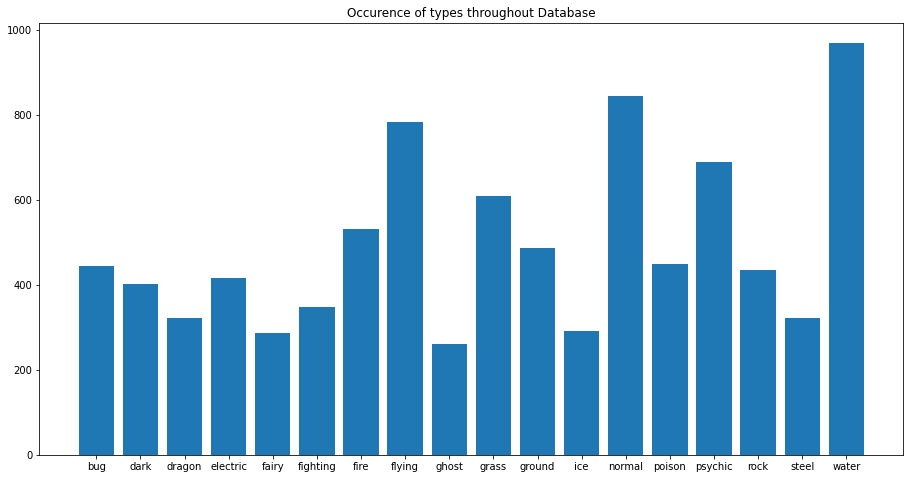

In [121]:
# Plotting Database occurence to see Balance of Data
type_cumulation = poke2_df.iloc[:,0:].sum().values
typo = poke2_df.index[1]
print(typo)
print(type_cumulation)
fig = plt.figure(figsize=(12,6))
ax = fig.add_axes([0,0,1,1])
ax.bar(all_indv_types, type_cumulation)
plt.title('Occurence of types throughout Database')
plt.show()



In [93]:
#DataBase Class

class Database:
    def __init__(self, images, labels):
        self.images =self.x = images
        self.labels = self.y = labels
    
    def add_data(self, images, labels):
        self.images.append(images)
        self.labels.append(labels)


In [103]:
dob = Database([[1,1]],[[2,2]])
dob.add_data([1,1],[3,3])
dob.y

[[2, 2], [3, 3]]